# üìò Proyecto de Aula - Fundamentos en Ciencia de Datos

*"An√°lisis exploratorio y procesamiento de data para el Dise√±o de una cadena de abastecimiento para la reducci√≥n del desperdicio de alimentos c√°rnicos en Colombia, considerando el marco normativo"*

# **1. Introducci√≥n**

**Pregunta de investigaci√≥n**
¬øCu√°l deber√≠a ser el dise√±o de una cadena de abastecimiento que contribuya a la disminuci√≥n de desperdicios de alimentos perecederos a trav√©s de donaciones que tenga en consideraci√≥n los requerimientos e incentivos operativos y normativos en Colombia?


La problem√°tica de las p√©rdidas y desperdicios de alimentos (PDA) es cr√≠tica a nivel global y nacional, con impactos econ√≥micos, sociales y ambientales significativos. En Colombia, se desperdician grandes cantidades de alimentos mientras m√°s de la mitad de la poblaci√≥n enfrenta inseguridad alimentaria, generando adem√°s emisiones contaminantes y p√©rdidas econ√≥micas del 1,3% del PIB. Las causas son m√∫ltiples: desde ineficiencias en la producci√≥n, distribuci√≥n y consumo, hasta vac√≠os normativos y log√≠sticos. Aunque el pa√≠s ha avanzado en legislaci√≥n (Ley 1990 de 2019 y Ley 2380 de 2024), los incentivos fiscales no se corresponden con la limitada capacidad log√≠stica, que solo permite recuperar el 12% del potencial alimentario disponible. Esto evidencia la urgencia de transformar la cadena de recuperaci√≥n alimentaria mediante modelos log√≠sticos m√°s eficientes, coordinados y adaptados al nuevo marco legal.

El problema de investigaci√≥n gira en torno a una empresa del sector alimentos carnicos, en d√≥nde tiene una excelente trazabilidad en cuanto al desperdicio de alimentos en una l√¨nea que es las "devoluciones", sin embargo, las "donaciones" son un tema de inter√©s y la data proporciona registros del 2022, 2023 y 2024.

# **2. Importar librer√≠as necesarias**

In [44]:
# Librer√≠as
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Instalar librer√≠as necesarias
!pip install pingouin seaborn
!pip install pandas numpy seaborn matplotlib scikit-learn openpyxl --quiet

# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **3. Carga de datos**

In [ ]:
# Datos
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_txt = "/content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/donaciones.txt"

# Crear DataSet
df = pd.read_csv(ruta_txt, sep=';', encoding='latin-1')

In [ ]:
# Visualizar una peque√±a muestra de los datos
df.head()

Semana Mes Calendario               FechaFact#  Material  \
0  2022.43        octubre  2022-10-28 00:00:00.000   1042123   
1  2022.16          abril  2022-04-18 00:00:00.000   1020417   
2  2022.16          abril  2022-04-18 00:00:00.000   1009665   
3  2022.16          abril  2022-04-18 00:00:00.000   1045789   
4  2022.16          abril  2022-04-18 00:00:00.000   1025354   

                              Denominaci√≥n Cantidad UMB C# Motivo ped  \
0        N/A Salch. Pavo PIETRAN 350g 7 UN       16  UN           D19   
1           Hamburg. Preasada ZENU x 400 g       23  UN           D19   
2         Salch. Tipo Alemana ZENU x 360 g        6  UN           D19   
3          N/ASalch. Cazadora CUNIT x 250g       25  UN           D19   
4  N/A Cbo.2Cbno.RANCHERA 200g Pleg.8 Und.        3  UN           D19   

  C# Centro   Valor  ...            Peso Kg          Desguace KG  Planta  \
0      NN18  129904  ...  0.349999994039536  559.999.990.463.257  Caloto   
1      NN14  194074  ...  0.400000005960464  919.999.980.926.514  Bogot√°   
2      NN14   44364  ...  0.360000014305115  216.000.008.583.069  Amarre   
3      NN14   80425  ...               0.25                 6.25  Bogot√°   
4      NN14   27288  ...  0.800000011920929  240.000.009.536.743  Bogot√°   

             Red          Negocio   a√±o Oficina de ventas  \
0  Red Comercial  Negocio C√°rnico  2022               NaN   
1  Red Comercial  Negocio C√°rnico  2022              20.0   
2  Red Comercial  Negocio C√°rnico  2022              20.0   
3  Red Comercial  Negocio C√°rnico  2022              20.0   
4  Red Comercial  Negocio C√°rnico  2022              20.0   

  Descripcion de la oficina            Ord/Ext       Causales  
0                  R Bogot√°       D. Ordinaria  Baja Rotaci√≥n  
1            R Barranquilla       D. Ordinaria  Baja Rotaci√≥n  
2            R Barranquilla       D. Ordinaria  Baja Rotaci√≥n  
3            R Barranquilla       D. Ordinaria  Baja Rotaci√≥n  
4            R Barranquilla  D. Extraordinaria  Baja Rotaci√≥n  

[5 rows x 30 columns]

In [ ]:
#PASO PARA ANALIZAR TODOS LOS CAMPOS DEL DF
# Obtener estad√≠sticas descriptivas
desc = df.describe(include="all")

# Ruta donde guardar el archivo en Google Drive
ruta_excel = "/content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/resumen_descriptivo.xlsx"

# Exportar a Excel
desc.to_excel(ruta_excel, sheet_name="Describe")

print(f"Archivo exportado en: {ruta_excel}")

Archivo exportado en: /content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/resumen_descriptivo.xlsx


# **4. Descripci√≥n de la base de datos**

In [ ]:
# Visualizar una peque√±a muestra de los datos
df.head()

Concatenado   Semana Mes Calendario    Factura               FechaFact#  \
0  1001069NN47  2023.12          marzo  INN558727  2023-03-25 00:00:00.000   
1  1011774NN47  2023.12          marzo  INN558727  2023-03-25 00:00:00.000   
2  1035355NNB1  2022.52      diciembre  INN534823  2022-12-26 00:00:00.000   
3  1035355NNB1  2022.52      diciembre  INN534830  2022-12-26 00:00:00.000   
4  1000145NN47  2023.12          marzo  INN558727  2023-03-25 00:00:00.000   

   Material                       Denominaci√É¬≥n  Cantidad UMB C# Motivo ped  \
0   1001069          Salch. Viena RICA  x 150 g       3.0  UN           D19   
1   1011774          Salch. Frankfurt ZENU 360g       1.0  UN           D19   
2   1035355  2 Jmn. PIETRAN Estd. x 100 g SIN C       2.0  UN           D19   
3   1035355  2 Jmn. PIETRAN Estd. x 100 g SIN C       1.0  UN           D19   
4   1000145             Cne. Diablo ZENU x 80 g       1.0  UN           D19   

   ...  Prod-Ubicaci√É¬≥n     Planta            Red            Negocio  a√É¬±o  \
0  ...      1001069NN47  Medell√É¬≠n  Red Comercial  Comercial Nutresa  2023   
1  ...      1011774NN47  Medell√É¬≠n  Red Comercial  Comercial Nutresa  2023   
2  ...      1035355NNB1  Medell√É¬≠n  Red Comercial   Negocio C√É¬°rnico  2022   
3  ...      1035355NNB1  Medell√É¬≠n  Red Comercial   Negocio C√É¬°rnico  2022   
4  ...      1000145NN47  Medell√É¬≠n  Red Comercial  Comercial Nutresa  2023   

  Oficina de ventas  Descripcion de la oficina       Ord/Ext        Causales  \
0                10                  R Bogot√É¬°  LV Ordinaria  Baja Rotaci√É¬≥n   
1                10                  R Bogot√É¬°  LV Ordinaria  Baja Rotaci√É¬≥n   
2               NaN                     R Cali  D. Ordinaria  Baja Rotaci√É¬≥n   
3               NaN                     R Cali  D. Ordinaria  Baja Rotaci√É¬≥n   
4                10                  R Bogot√É¬°  LV Ordinaria  Baja Rotaci√É¬≥n   

  Causales NUEVOS  
0  Baja Rotaci√É¬≥n  
1  Baja Rotaci√É¬≥n  
2  Baja Rotaci√É¬≥n  
3  Baja Rotaci√É¬≥n  
4  Baja Rotaci√É¬≥n  

[5 rows x 42 columns]

In [ ]:
# N√∫mero de registros y variables
print(f"N√∫mero de registros: {df.shape[0]}")
print(f"N√∫mero de variables: {df.shape[1]}")

N√∫mero de registros: 52726
N√∫mero de variables: 42


In [ ]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
object     32
float64     5
int64       5
Name: count, dtype: int64


**SELECCI√ìN DE VARIABLES DE INTER√âS**

En vista de que es una base de datos muy grande y en realidad para el estudio no es necesario utilizar todas las variables, se realizan dos filtros para seleccionar las variables de inter√©s. En primer lugar se depurar las variables sin objetivo propio, variables redundantes, etc. Que se presentan a continuaci√≥n:

| üß© **Variable** | üìê **Motivo eliminaci√≥n** |
|------------------|-------------|
|  **1 Concatenado**  | Es un campo de c√≥digo de concatenaci√≥n entre otras coolumnas |
|  **2 Semana**     | Se puede obtener del campo fecha |
|  **3 Mes Calendario**      | Se puede obtener del campo fecha |
|  **4 Factura**  |  No aporta informaci√≥n relevante al an√°lisis |
|  **5 Denominaci√≥n**  | Es la descripci√≥n del material |
|  **6 UMB**    | La Unidad de Medida Base, es una variable que no aporta infromaci√≥n al an√°lisis. |
|  **7 Doc#vtas#**    | No aporta informaci√≥n relevante al an√°lisis |
|  **8 Rsp Pa**    | No aporta informaci√≥n relevante al an√°lisis |
|  **9 Clase de Doc Ventas**    | No aporta informaci√≥n relevante al an√°lisis |
|  **10 C# Costos**    | El centro de costos es un dato relevante para an√°lisis financieros |
|  **11 Texto**    | Son textos de reporte que no tienen una l√≠nea de informaci√≥n estricta |
|  **12 Centro**    | Son los nombres del c√≥digo del centro de costos |
|  **13 Tipo de Desguace**    | Se elimina, porque todo es donaci√≥n |
|  **14 Motivo de desguace**    | Se elimina, porque es igual al campo "CAUSAL" |
|  **15 Prod-Ubicaci√≥n**    | Es una combinaci√≥n entredos campos |
|  **16 A√±o**    | El campo se puede extraer del campo "fechafact" |
|  **17 Oficina de ventas**    | Campo duplicado "oficina de ventas" |
|  **18 Descripcion de la oficina**    | Es la descripci√≥n de la oficina de ventas |
|  **19 Causales**    | Est√° incompleto, la variable completa es CAUSALES NUEVAS |
|  **20 Motivo de pedido**    | Es la descripci√≥n del C#motivopedido |


En una segunda fase, para elegir las variables por medio de una b√∫squeda de literatura, Akka≈ü y Gaur (2022) analiza el problema del desperdicio de alimentos y propone una agenda de investigaci√≥n dentro del campo de la gesti√≥n de operaciones (OM) para contribuir a su reducci√≥n. Aunque el inter√©s en este tema ha aumentado notablemente desde 2010, el enfoque desde la OM sigue siendo limitado en comparaci√≥n con otras disciplinas. El estudio clasifica el desperdicio seg√∫n su tipo, causas, etapas de la cadena de valor y cuestiones relacionadas con su cuantificaci√≥n, reducci√≥n y recuperaci√≥n.

La agenda de investigaci√≥n se organiza en cinco √°reas clave: tecnolog√≠a, log√≠stica, incentivos y coordinaci√≥n, innovaci√≥n en modelos de negocio y operaciones conductuales. Adem√°s, Akka≈ü y Gaur (2022) resalta el potencial educativo del tema en cursos de OM y las oportunidades que ofrecen las tecnolog√≠as digitales y las plataformas de recuperaci√≥n de alimentos. En conclusi√≥n, hace un llamado a la comunidad acad√©mica para fortalecer la investigaci√≥n interdisciplinaria y desarrollar soluciones innovadoras frente a este desaf√≠o global.

As√≠ que, como bien lo menciona Akka≈ü y Gaur (2022) es un tema actual y no hay estudios que analicen este tema desde la Invetsigaci√≥n de operaciones, por lo tanto no hay una gu√≠a para especificar qu√© variables ser√≠an de inter√©s. Es por esto que apuntando al avance que existe en el proyecto, se ilustra en la Figura 1, el modelo que se quiere estudiar y a partir de esta figura y las reuniones con expertos en el sector, se eligen las siguinetes variables a estudiar:

Imagen122.png




Copia de Desperdicio de Alimentos.png


Figura 1. Elaboraci√≥n Propia

**Descripci√≥n Variables del Dataset Donaciones**

La fuente de todos los datos es de una data oficial proporcionada por la compa√±√≠a. [Documento ](https://docs.google.com/spreadsheets/d/16SQxba2H8U0lxludiHO7PpxPHJKbWCF6/edit?usp=sharing&ouid=104953301056408980999&rtpof=true&sd=true) de todo el proceso de depuraci√≥n.

| üß© Variable      | üìê Tipo        | üìù Descripci√≥n                                                                 |
|------------------|---------------|---------------------------------------------------------------------------------|
| cantidad   | Continuo | N√∫mero de unidades donadas     |
| valor      | Continuo | Precio de la donaci√≥n     |
| peso_kg    | Continuo  | Peso de cada donaci√≥n en Kg  |
| donacion_kg  | Continuo  | Donaci√≥n en Kg                                                  |
| material    | Categ√≥rica/C√≥digo    | C√≥digo de producto que se don√≥       |
| motivo  | Categ√≥rica/C√≥digo      | Raz√≥n por la cu√°l se don√≥ (D19: Devoluci√≥n)
| FechaFact#   | Date   | Fecha en la que se hizo la donaci√≥n |
| planta   | Categ√≥rica/C√≥digo        | Planta en d√≥nde se don√≥ NN21: Medell√≠n      |
| centro    | Categ√≥rica/C√≥digo  | CEDI en d√≥nde se don√≥ NN21: Medell√≠n  |
| Ofc#Ventas  | Categ√≥rica/C√≥digo   | Oficina en d√≥nde se don√≥ NN21: Medell√≠n  |
| Categoria  | Categ√≥rica/C√≥digo   | Tipo de material (alimentos larga vida, carnes frescas, etc.)  |
| Subcategor√≠a  | Categ√≥rica/C√≥digo   | Tipo de material (larga vida carnicos, tajados, etc)  |
| Linea  | Categ√≥rica/C√≥digo   | Linea de producci√≥n de los materiales donados |
| Marca  | Categ√≥rica/C√≥digo   | Marca de los materiales donados |
| Ord/Ext  | Categ√≥rica/C√≥digo   | Tipo de dmanda de los materiales |
| Causales NUEVOS  | Categ√≥rica/C√≥digo   | Causal de donaci√≥n |

# **5. Limpieza de los datos**

In [ ]:
# Seleccionar columnas espec√≠ficas y renombrarlas
nuevo_df = df[["FechaFact#", "Material", "Cantidad", "C# Motivo ped", "Valor", "Peso Kg", "Desguace KG", "Planta", "C# Centro", "Ofc# Ventas", "Categor√É¬≠a ", "Subcategor√É¬≠a",
               "Linea", "Marca", "Ord/Ext", "Causales NUEVOS"
]].rename(
    columns={
        "FechaFact#": "fecha",
        "Material": "material",
        "Cantidad": "cantidad",
        "C# Motivo ped": "motivo",
        "Valor": "valor",
        "Peso Kg": "peso_kg",
        "Desguace KG": "donacion_kg",
        "Planta": "planta",
        "C# Centro": "centro",
        "Ofc# Ventas": "of_ventas",
        "Categor√É¬≠a ": "categoria",
        "Subcategor√É¬≠a": "subcategoria",
        "Linea": "linea",
        "Marca": "marca",
        "Ord/Ext": "demanda",
        "Causales NUEVOS": "causales"
    }
)

# Verifica el resultado
nuevo_df.head()


fecha  material  cantidad motivo  valor  peso_kg  \
0  2023-03-25 00:00:00.000   1001069       3.0    D19   5232     0.15   
1  2023-03-25 00:00:00.000   1011774       1.0    D19   3643     0.36   
2  2022-12-26 00:00:00.000   1035355       2.0    D19   8762     0.20   
3  2022-12-26 00:00:00.000   1035355       1.0    D19   4381     0.20   
4  2023-03-25 00:00:00.000   1000145       1.0    D19   2854     0.08   

   donacion_kg     planta centro of_ventas             categoria  \
0         0.45  Medell√É¬≠n   NN47        10  Alimentos larga vida   
1         0.36  Medell√É¬≠n   NN47        10  Alimentos larga vida   
2         0.40  Medell√É¬≠n   NNB1       NaN         Carnes fr√É¬≠as   
3         0.20  Medell√É¬≠n   NNB1       NaN         Carnes fr√É¬≠as   
4         0.08  Medell√É¬≠n   NN47        10  Alimentos larga vida   

           subcategoria                       linea     marca       demanda  \
0  Larga vida C√É¬°rnicos       Salchichas Larga vida      Rica  LV Ordinaria   
1  Larga vida C√É¬°rnicos       Salchichas Larga vida     Zen√É¬∫  LV Ordinaria   
2               Tajados                      Jam√É¬≥n  Pietr√É¬°n  D. Ordinaria   
3               Tajados                      Jam√É¬≥n  Pietr√É¬°n  D. Ordinaria   
4  Larga vida C√É¬°rnicos  Otros Larga vida C√É¬°rnicos     Zen√É¬∫  LV Ordinaria   

         causales  
0  Baja Rotaci√É¬≥n  
1  Baja Rotaci√É¬≥n  
2  Baja Rotaci√É¬≥n  
3  Baja Rotaci√É¬≥n  
4  Baja Rotaci√É¬≥n

In [ ]:
# 1Ô∏è‚É£ Convertir todas las columnas a texto y corregir caracteres mal codificados
nuevo_df = nuevo_df.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

# 2Ô∏è‚É£ Convertir todo el texto a min√∫sculas
nuevo_df = nuevo_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Verifica el resultado
nuevo_df.head()


/tmp/ipython-input-1729272876.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nuevo_df = nuevo_df.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
/tmp/ipython-input-1729272876.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nuevo_df = nuevo_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


fecha  material  cantidad motivo  valor  peso_kg  \
0  2023-03-25 00:00:00.000   1001069       3.0    d19   5232     0.15   
1  2023-03-25 00:00:00.000   1011774       1.0    d19   3643     0.36   
2  2022-12-26 00:00:00.000   1035355       2.0    d19   8762     0.20   
3  2022-12-26 00:00:00.000   1035355       1.0    d19   4381     0.20   
4  2023-03-25 00:00:00.000   1000145       1.0    d19   2854     0.08   

   donacion_kg    planta centro of_ventas             categoria  \
0         0.45  medell√≠n   nn47        10  alimentos larga vida   
1         0.36  medell√≠n   nn47        10  alimentos larga vida   
2         0.40  medell√≠n   nnb1       NaN          carnes fr√≠as   
3         0.20  medell√≠n   nnb1       NaN          carnes fr√≠as   
4         0.08  medell√≠n   nn47        10  alimentos larga vida   

          subcategoria                      linea    marca       demanda  \
0  larga vida c√°rnicos      salchichas larga vida     rica  lv ordinaria   
1  larga vida c√°rnicos      salchichas larga vida     zen√∫  lv ordinaria   
2              tajados                      jam√≥n  pietr√°n  d. ordinaria   
3              tajados                      jam√≥n  pietr√°n  d. ordinaria   
4  larga vida c√°rnicos  otros larga vida c√°rnicos     zen√∫  lv ordinaria   

        causales  
0  baja rotaci√≥n  
1  baja rotaci√≥n  
2  baja rotaci√≥n  
3  baja rotaci√≥n  
4  baja rotaci√≥n

In [ ]:
nuevo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52726 entries, 0 to 52725
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         52726 non-null  object 
 1   material      52726 non-null  int64  
 2   cantidad      52726 non-null  float64
 3   motivo        52726 non-null  object 
 4   valor         52726 non-null  int64  
 5   peso_kg       52726 non-null  float64
 6   donacion_kg   52726 non-null  float64
 7   planta        52726 non-null  object 
 8   centro        52726 non-null  object 
 9   of_ventas     47795 non-null  object 
 10  categoria     52725 non-null  object 
 11  subcategoria  44393 non-null  object 
 12  linea         52624 non-null  object 
 13  marca         52724 non-null  object 
 14  demanda       52726 non-null  object 
 15  causales      52726 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 6.4+ MB


**Modificar el tipo de dato**

In [ ]:
# Convertir a tipo datetime y luego formatear
nuevo_df["fecha"] = pd.to_datetime(nuevo_df["fecha"], errors="coerce").dt.strftime("%Y.%m.%d")

In [ ]:
# Convertir las variables categoricas
categoricas = ["material", "motivo", "planta", "centro", "of_ventas", "categoria", "subcategoria", "linea", "marca", "demanda", "causales"]

for col in categoricas:
    nuevo_df[col] = nuevo_df[col].astype("category")

In [ ]:
# Convertir las variables enteras
enteras = ["cantidad"]
nuevo_df[enteras] = nuevo_df[enteras].astype("int64")

In [ ]:
# Convertir las variables continuas
continuas = ["valor", "peso_kg", "donacion_kg"]
nuevo_df[continuas] = nuevo_df[continuas].astype("float64").round(2)


In [ ]:
nuevo_df.info()
nuevo_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52726 entries, 0 to 52725
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fecha         52726 non-null  object  
 1   material      52726 non-null  category
 2   cantidad      52726 non-null  int64   
 3   motivo        52726 non-null  category
 4   valor         52726 non-null  float64 
 5   peso_kg       52726 non-null  float64 
 6   donacion_kg   52726 non-null  float64 
 7   planta        52726 non-null  category
 8   centro        52726 non-null  category
 9   of_ventas     47795 non-null  category
 10  categoria     52725 non-null  category
 11  subcategoria  44393 non-null  category
 12  linea         52624 non-null  category
 13  marca         52724 non-null  category
 14  demanda       52726 non-null  category
 15  causales      52726 non-null  category
dtypes: category(11), float64(3), int64(1), object(1)
memory usage: 2.6+ MB


fecha material  cantidad motivo   valor  peso_kg  donacion_kg  \
0  2023.03.25  1001069         3    d19  5232.0     0.15         0.45   
1  2023.03.25  1011774         1    d19  3643.0     0.36         0.36   
2  2022.12.26  1035355         2    d19  8762.0     0.20         0.40   
3  2022.12.26  1035355         1    d19  4381.0     0.20         0.20   
4  2023.03.25  1000145         1    d19  2854.0     0.08         0.08   

     planta centro of_ventas             categoria         subcategoria  \
0  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   
1  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   
2  medell√≠n   nnb1       NaN          carnes fr√≠as              tajados   
3  medell√≠n   nnb1       NaN          carnes fr√≠as              tajados   
4  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   

                       linea    marca       demanda       causales  
0      salchichas larga vida     rica  lv ordinaria  baja rotaci√≥n  
1      salchichas larga vida     zen√∫  lv ordinaria  baja rotaci√≥n  
2                      jam√≥n  pietr√°n  d. ordinaria  baja rotaci√≥n  
3                      jam√≥n  pietr√°n  d. ordinaria  baja rotaci√≥n  
4  otros larga vida c√°rnicos     zen√∫  lv ordinaria  baja rotaci√≥n

In [ ]:
df_nuevo = nuevo_df

In [ ]:
from google.colab import files

# Guardar el archivo temporalmente
df_nuevo.to_csv("df_nuevo.csv", index=False, encoding="utf-8-sig")

# Descargarlo
files.download("df_nuevo.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **6. Anl√°sis exploratio (EDA)**

In [3]:
# Datos
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_txt = "/content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/df_nuevo.csv"

# Crear DataSet
df_nuevo = pd.read_csv(ruta_txt, sep=',', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 1Ô∏è‚É£ Convertir todas las columnas a texto y corregir caracteres mal codificados
df_nuevo = df_nuevo.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

# 2Ô∏è‚É£ Convertir todo el texto a min√∫sculas
df_nuevo = df_nuevo.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipython-input-1334900422.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_nuevo = df_nuevo.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
/tmp/ipython-input-1334900422.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_nuevo = df_nuevo.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [5]:
# Convertir las variables categoricas
categoricas = ["material", "motivo", "planta", "centro", "of_ventas", "categoria", "subcategoria", "linea", "marca", "demanda", "causales"]

for col in categoricas:
    df_nuevo[col] = df_nuevo[col].astype("category")

In [6]:
# Convertir las variables enteras
enteras = ["cantidad"]
df_nuevo[enteras] = df_nuevo[enteras].astype("int64")

In [7]:
# Convertir las variables continuas
continuas = ["valor", "peso_kg", "donacion_kg"]
df_nuevo[continuas] = df_nuevo[continuas].astype("float64").round(2)


In [8]:
df_nuevo.rename(columns={df_nuevo.columns[0]: "fecha"}, inplace=True)


In [9]:
df_nuevo.info()
df_nuevo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52726 entries, 0 to 52725
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fecha         52726 non-null  object  
 1   material      52726 non-null  category
 2   cantidad      52726 non-null  int64   
 3   motivo        52726 non-null  category
 4   valor         52726 non-null  float64 
 5   peso_kg       52726 non-null  float64 
 6   donacion_kg   52726 non-null  float64 
 7   planta        52726 non-null  category
 8   centro        52726 non-null  category
 9   of_ventas     47795 non-null  category
 10  categoria     52725 non-null  category
 11  subcategoria  44393 non-null  category
 12  linea         52624 non-null  category
 13  marca         52724 non-null  category
 14  demanda       52726 non-null  category
 15  causales      52726 non-null  category
dtypes: category(11), float64(3), int64(1), object(1)
memory usage: 2.6+ MB


fecha material  cantidad motivo   valor  peso_kg  donacion_kg  \
0  2023.03.25  1001069         3    d19  5232.0     0.15         0.45   
1  2023.03.25  1011774         1    d19  3643.0     0.36         0.36   
2  2022.12.26  1035355         2    d19  8762.0     0.20         0.40   
3  2022.12.26  1035355         1    d19  4381.0     0.20         0.20   
4  2023.03.25  1000145         1    d19  2854.0     0.08         0.08   

     planta centro of_ventas             categoria         subcategoria  \
0  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   
1  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   
2  medell√≠n   nnb1       NaN          carnes fr√≠as              tajados   
3  medell√≠n   nnb1       NaN          carnes fr√≠as              tajados   
4  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   

                       linea    marca       demanda       causales  
0      salchichas larga vida     rica  lv ordinaria  baja rotaci√≥n  
1      salchichas larga vida     zen√∫  lv ordinaria  baja rotaci√≥n  
2                      jam√≥n  pietr√°n  d. ordinaria  baja rotaci√≥n  
3                      jam√≥n  pietr√°n  d. ordinaria  baja rotaci√≥n  
4  otros larga vida c√°rnicos     zen√∫  lv ordinaria  baja rotaci√≥n

In [10]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df_nuevo.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
subcategoria    8333
of_ventas       4931
linea            102
marca              2
categoria          1
dtype: int64


In [11]:
# Conteo de valores √∫nicos por variable
print("\nConteo de valores √∫nicos por variable:")
print(df_nuevo.nunique().sort_values(ascending=False))


Conteo de valores √∫nicos por variable:
valor           22097
donacion_kg      3678
fecha             955
cantidad          724
material          668
peso_kg           130
centro             59
linea              48
subcategoria       25
causales           20
of_ventas          18
motivo             16
categoria          15
planta             13
marca              11
demanda             4
dtype: int64


In [12]:
# Estad√≠sticos descriptivos b√°sicos
print("üìä Estad√≠sticos descriptivos:")
print(df_nuevo[["cantidad", "valor", "peso_kg", "donacion_kg"]].describe())

# Si quieres incluir tambi√©n moda y varianza:
moda = df_nuevo.mode().iloc[0] # moda de cada columna
varianza = df_nuevo[["cantidad", "valor", "peso_kg", "donacion_kg"]].var(numeric_only=True)

print("\nüìä Moda de cada variable:")
print(moda)

print("\nüìä Varianza de cada variable:")
print(varianza)

üìä Estad√≠sticos descriptivos:
           cantidad         valor       peso_kg   donacion_kg
count  52726.000000  5.272600e+04  52726.000000  52726.000000
mean      23.460323  1.225071e+05      0.398050      9.565795
std      118.063110  6.292265e+05      0.342983     50.929727
min        0.000000  0.000000e+00      0.000000      0.000000
25%        1.000000  4.940000e+03      0.180000      0.450000
50%        4.000000  1.362250e+04      0.300000      1.200000
75%       12.000000  5.437125e+04      0.500000      4.200000
max     5990.000000  3.691350e+07      5.240000   3337.750000

üìä Moda de cada variable:
fecha                     2024.07.05
material                     1000855
cantidad                           1
motivo                           d19
valor                            0.0
peso_kg                         0.15
donacion_kg                      0.3
planta                       la ceja
centro                          nn47
of_ventas                         10
categoria 

üìà An√°lisis descriptivo general

Las variables presentan una alta dispersi√≥n, evidenciada por desviaciones est√°ndar elevadas, especialmente en cantidad, valor y donacion_kg, lo que indica que existen observaciones con valores mucho mayores que la media.

Cantidad: promedio de 23,46 unidades, pero con casos que llegan hasta 5.990, reflejando una fuerte asimetr√≠a positiva.

Valor: media de 122.507, pero con un m√°ximo de 36,9 millones, lo que confirma la presencia de valores extremos.

Peso (kg): concentrado entre 0,18 y 0,50 kg (rango intercuart√≠lico estrecho), lo que sugiere homogeneidad en los productos.

Donaci√≥n (kg): promedio de 9,57 kg, aunque el valor m√°ximo (3.337,75 kg) indica algunos casos de donaciones masivas.

üîπ Modas

Producto m√°s com√∫n: material 1000855, categor√≠a ‚Äúalimentos larga vida‚Äù, subcategor√≠a ‚Äúlarga vida vegetales‚Äù, l√≠nea ‚Äúgranos‚Äù, marca Zen√∫.

Donaciones asociadas a la planta La Ceja, centro NN47, con motivo d19 (baja rotaci√≥n).
Esto sugiere que la mayor√≠a de las donaciones provienen de productos de larga duraci√≥n con baja rotaci√≥n en inventario.

üîπ Varianza

La alta varianza en valor (3,96√ó10¬π¬π) y cantidad (1,39√ó10‚Å¥) confirma la variabilidad en los montos y vol√∫menes donados, mientras que peso_kg tiene una varianza baja, indicando consistencia en el tipo de producto.

# *An√°lisis Continuas*

**Medidas de tendencia central**


üìä Medidas de tendencia central para 'cantidad':
Media:   23.46 unidades
Mediana: 4.00 unidades
Moda:    1.00 unidades



üìä Medidas de tendencia central para 'valor':
Media:   122507.05 pesos
Mediana: 13622.50 pesos
Moda:    0.00 pesos



üìä Medidas de tendencia central para 'peso_kg':
Media:   0.40 kg
Mediana: 0.30 kg
Moda:    0.15 kg



üìä Medidas de tendencia central para 'donacion_kg':
Media:   9.57 kg
Mediana: 1.20 kg
Moda:    0.30 kg


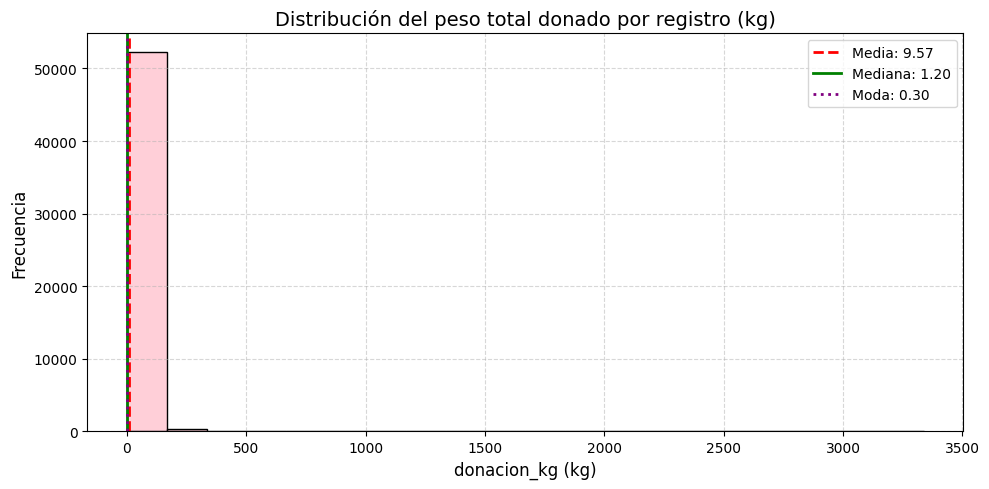

In [13]:
# Lista de variables continuas y sus unidades
variables = [
    ("cantidad", "unidades"),
    ("valor", "pesos"),
    ("peso_kg", "kg"),
    ("donacion_kg", "kg")
]

# T√≠tulos descriptivos para cada variable
titulos = {
    "cantidad": "Distribuci√≥n de la cantidad de productos donados (Und)",
    "valor": "Distribuci√≥n del valor monetario de las donaciones ($)",
    "peso_kg": "Distribuci√≥n del peso individual de los productos (kg)",
    "donacion_kg": "Distribuci√≥n del peso total donado por registro (kg)"
}

# Iterar sobre cada variable y graficar
for columna, unidad in variables:
    # Medidas de tendencia central
    media = np.mean(df_nuevo[columna])
    mediana = np.median(df_nuevo[columna])
    moda = stats.mode(df_nuevo[columna], keepdims=True)[0][0]

    # Mostrar resultados
    print(f"\nüìä Medidas de tendencia central para '{columna}':")
    print(f"Media:   {media:.2f} {unidad}")
    print(f"Mediana: {mediana:.2f} {unidad}")
    print(f"Moda:    {moda:.2f} {unidad}")

    # Gr√°fica
    plt.figure(figsize=(10, 5))
    sns.histplot(df_nuevo[columna], bins=20, kde=False, color="#ffc0cb")

    # L√≠neas de tendencia central
    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
    plt.axvline(moda, color='purple', linestyle=':', linewidth=2, label=f'Moda: {moda:.2f}')

    # Est√©tica
    plt.title(titulos[columna], fontsize=14)
    plt.xlabel(f"{columna} ({unidad})", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


*An√°lisis*

En las gr√°ficas de cantidad, valor y donacion_kg, afirman el an√°lisis anterior con un comportamiento de valores elevados, con 50.000 el valor con mayor frecuencia en estas variables. Y por su parte en el peso individual se evidencia un comportamiento diferente, ya que aqu√≠ analizamos en peso de cada producto donado, en el que un peso muy bajo tiene la mayor cantidad de participaci√≥n, menores a 1 kg, es por esto que la distribuci√≥n se evidencia con una cola hacia la derecha.

**Medidas de dispersi√≥n**

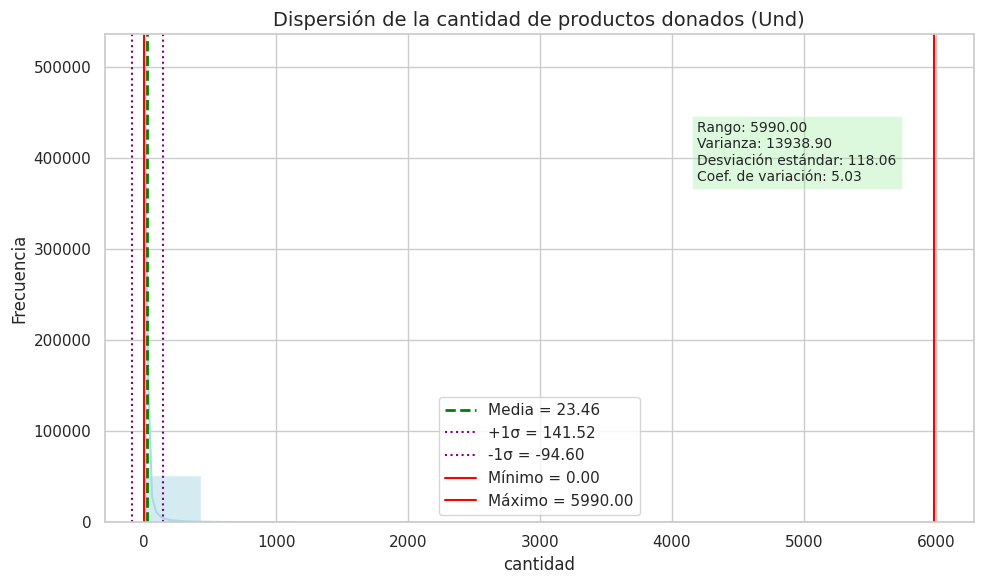

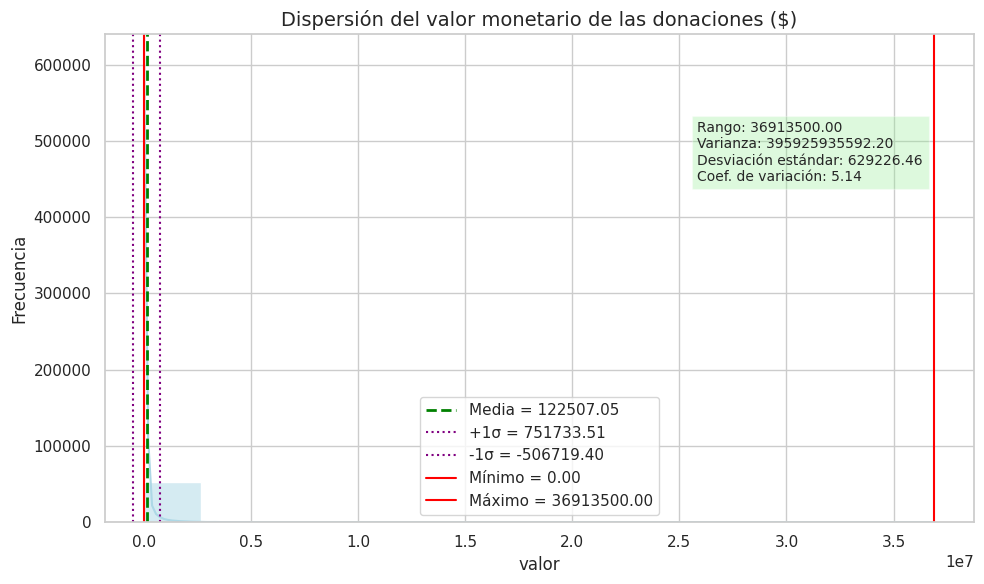

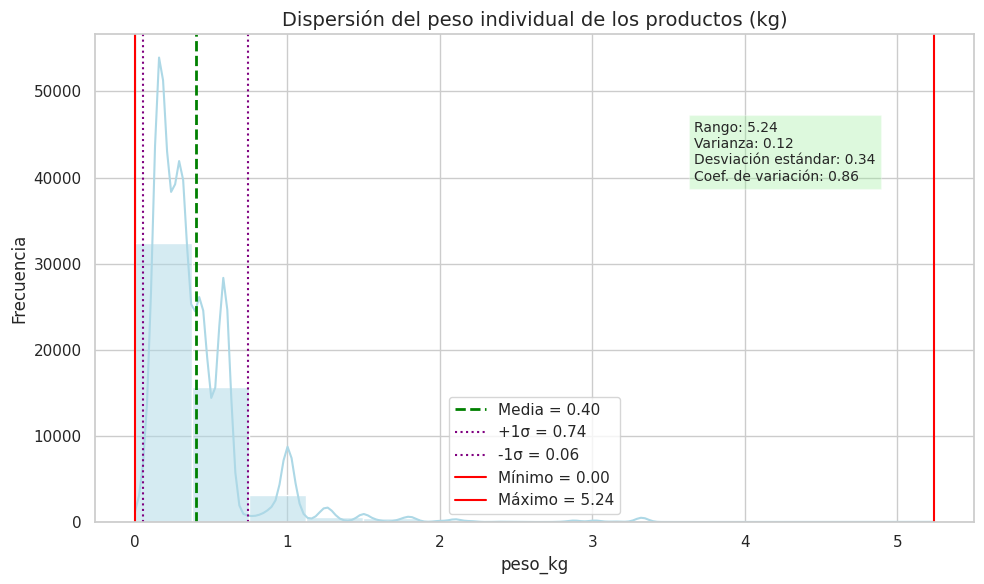

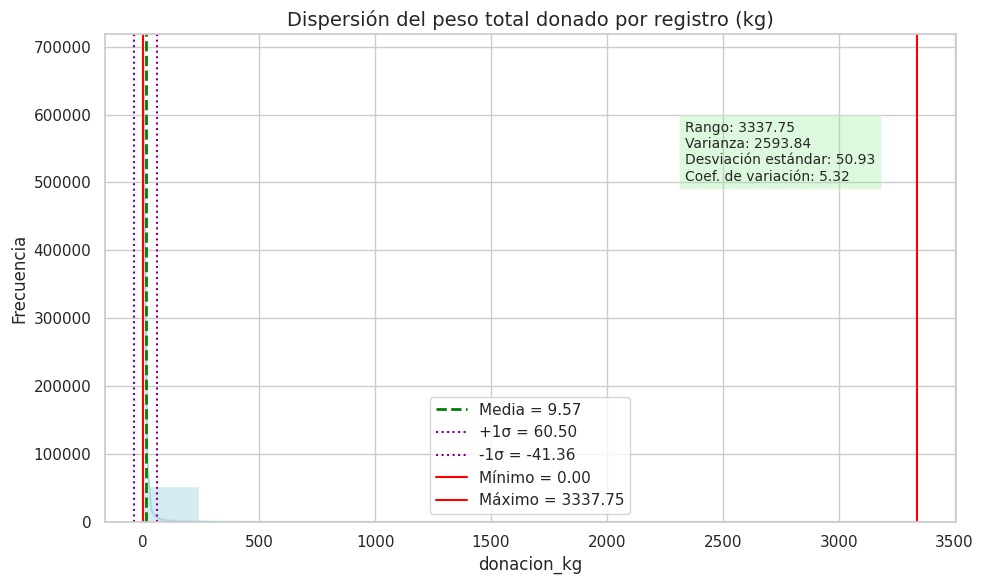

In [14]:
sns.set_theme(style="whitegrid")

# Variables continuas
variables = ['cantidad', 'valor', 'peso_kg', 'donacion_kg']

# T√≠tulos descriptivos para cada variable
titulos = {
    "cantidad": "Dispersi√≥n de la cantidad de productos donados (Und)",
    "valor": "Dispersi√≥n del valor monetario de las donaciones ($)",
    "peso_kg": "Dispersi√≥n del peso individual de los productos (kg)",
    "donacion_kg": "Dispersi√≥n del peso total donado por registro (kg)"
}

# Iterar sobre cada variable
for var in variables:
    datos = df_nuevo[var].dropna()  # eliminar valores nulos

    # Medidas de dispersi√≥n
    media = np.mean(datos)
    minimo = np.min(datos)
    maximo = np.max(datos)
    rango = maximo - minimo
    varianza = np.var(datos, ddof=1)
    desviacion = np.std(datos, ddof=1)
    coef_var = desviacion / media if media != 0 else np.nan

    # Gr√°fico
    plt.figure(figsize=(10, 6))
    sns.histplot(datos, bins=14, kde=True, color='lightblue')

    # L√≠neas verticales
    plt.axvline(media, color='green', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
    plt.axvline(media + desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'+1œÉ = {media + desviacion:.2f}')
    plt.axvline(media - desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'-1œÉ = {media - desviacion:.2f}')
    plt.axvline(minimo, color='red', linestyle='-', linewidth=1.5, label=f'M√≠nimo = {minimo:.2f}')
    plt.axvline(maximo, color='red', linestyle='-', linewidth=1.5, label=f'M√°ximo = {maximo:.2f}')

    # T√≠tulo y etiquetas descriptivas
    plt.title(titulos[var], fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend()

    # Recuadro con medidas de dispersi√≥n
    texto = (
        f"Rango: {rango:.2f}\n"
        f"Varianza: {varianza:.2f}\n"
        f"Desviaci√≥n est√°ndar: {desviacion:.2f}\n"
        f"Coef. de variaci√≥n: {coef_var:.2f}"
    )
    plt.text(
        maximo - 0.3 * rango,              # posici√≥n m√°s ajustada al gr√°fico
        plt.gca().get_ylim()[1] * 0.7,     # altura proporcional
        texto,
        bbox=dict(facecolor='lightgreen', alpha=0.3),
        fontsize=10
    )

    plt.tight_layout()
    plt.show()



*An√°lisis*

üìä Cantidad (Und)
La variable cantidad presenta una alta dispersi√≥n, con un rango muy amplio (5.990 unidades) y un coeficiente de variaci√≥n de 5.03, lo que indica una gran variabilidad en el n√∫mero de productos donados por registro. Aunque el promedio es bajo (23.46 unidades), existen registros con valores extremadamente altos, lo que sugiere la presencia de outliers o donaciones muy grandes en comparaci√≥n con la mayor√≠a.

üí∞ Valor ($)
El valor monetario de las donaciones muestra una dispersi√≥n muy elevada (CV = 5.14), con una desviaci√≥n est√°ndar que supera ampliamente la media. Esto indica una fuerte variabilidad en los montos donados: mientras algunos registros presentan valores bajos o nulos, otros alcanzan cifras muy altas (hasta 36,9 millones), evidenciando la existencia de donaciones muy altas en magnitud econ√≥mica.

‚öñÔ∏è Peso individual (kg)
El peso_kg tiene una variabilidad moderada (CV = 0.86). La mayor√≠a de los productos pesan menos de medio kilo en promedio (0.40 kg), pero algunos alcanzan hasta 5.24 kg. Esta dispersi√≥n sugiere que existen tanto productos livianos (como unidades peque√±as o empaques individuales) como otros de mayor peso, posiblemente empaques m√∫ltiples o productos voluminosos.

üì¶ Donaci√≥n total (kg)
El peso total donado por registro exhibe una alta dispersi√≥n (CV = 5.32), con un rango muy amplio (hasta 3.337,75 kg). Esto indica que las cantidades totales de peso donado por registro var√≠an significativamente entre las observaciones, probablemente debido a diferencias en el tama√±o de los env√≠os o el tipo de producto donado.

**Medidas de distriuci√≥n**

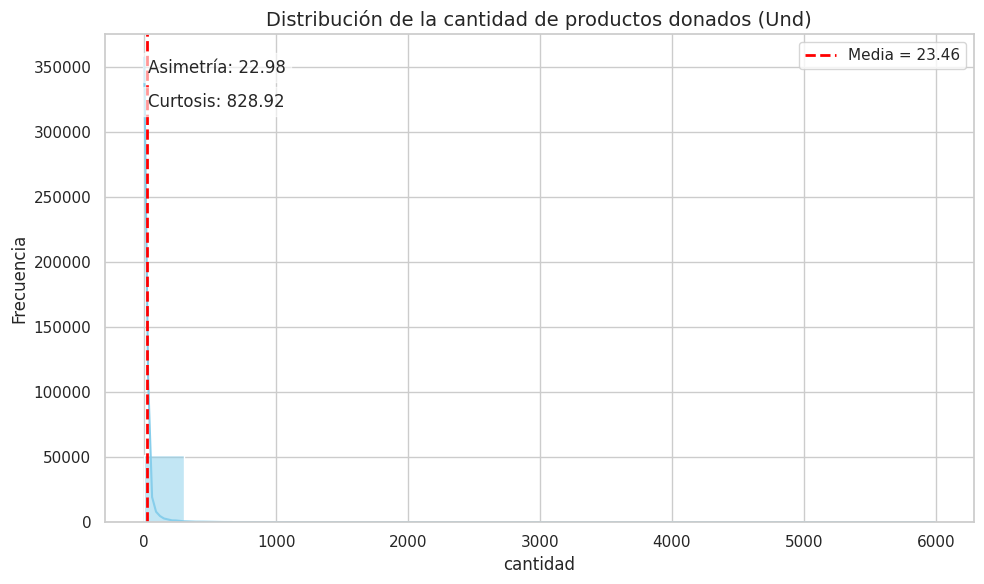

üìà An√°lisis de forma de la distribuci√≥n para 'cantidad':
------------------------------------------------------------
La distribuci√≥n es fuertemente asim√©trica a la derecha (asimetr√≠a = 22.98), lo que sugiere la presencia de valores extremos altos.
Adem√°s, presenta una curtosis elevada (curtosis = 828.92), indicando colas m√°s pesadas que una distribuci√≥n normal.
------------------------------------------------------------



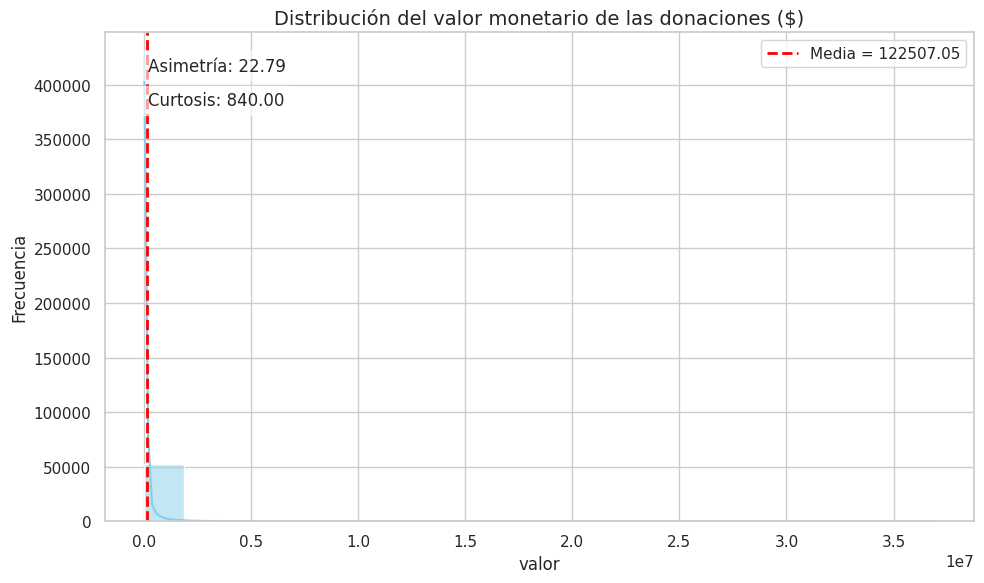

üìà An√°lisis de forma de la distribuci√≥n para 'valor':
------------------------------------------------------------
La distribuci√≥n es fuertemente asim√©trica a la derecha (asimetr√≠a = 22.79), lo que sugiere la presencia de valores extremos altos.
Adem√°s, presenta una curtosis elevada (curtosis = 840.00), indicando colas m√°s pesadas que una distribuci√≥n normal.
------------------------------------------------------------



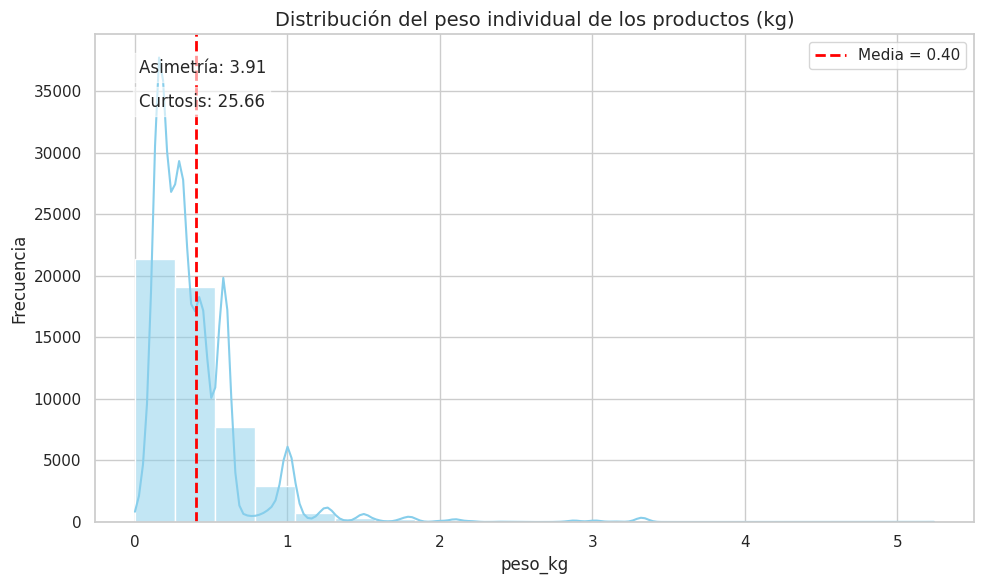

üìà An√°lisis de forma de la distribuci√≥n para 'peso_kg':
------------------------------------------------------------
La distribuci√≥n es fuertemente asim√©trica a la derecha (asimetr√≠a = 3.91), lo que sugiere la presencia de valores extremos altos.
Adem√°s, presenta una curtosis elevada (curtosis = 25.66), indicando colas m√°s pesadas que una distribuci√≥n normal.
------------------------------------------------------------



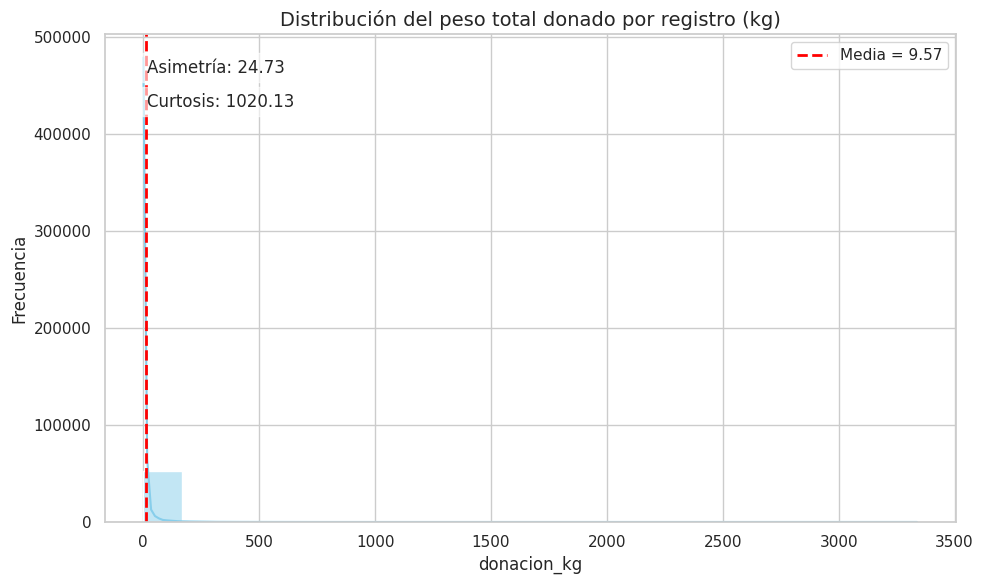

üìà An√°lisis de forma de la distribuci√≥n para 'donacion_kg':
------------------------------------------------------------
La distribuci√≥n es fuertemente asim√©trica a la derecha (asimetr√≠a = 24.73), lo que sugiere la presencia de valores extremos altos.
Adem√°s, presenta una curtosis elevada (curtosis = 1020.13), indicando colas m√°s pesadas que una distribuci√≥n normal.
------------------------------------------------------------



In [15]:
# Estilo visual
sns.set_theme(style="whitegrid")

# Variables continuas
variables = ['cantidad', 'valor', 'peso_kg', 'donacion_kg']

# T√≠tulos descriptivos para cada variable
titulos = {
    "cantidad": "Distribuci√≥n de la cantidad de productos donados (Und)",
    "valor": "Distribuci√≥n del valor monetario de las donaciones ($)",
    "peso_kg": "Distribuci√≥n del peso individual de los productos (kg)",
    "donacion_kg": "Distribuci√≥n del peso total donado por registro (kg)"
}

# Iterar sobre cada variable
for var in variables:
    datos = df_nuevo[var].dropna()

    # C√°lculo de asimetr√≠a y curtosis
    asimetria = skew(datos)
    curtosis_valor = kurtosis(datos)

    # Gr√°fico
    plt.figure(figsize=(10, 6))
    sns.histplot(datos, kde=True, color='skyblue', bins=20)
    plt.axvline(np.mean(datos), color='red', linestyle='--', linewidth=2, label=f'Media = {np.mean(datos):.2f}')

    # Anotaciones
    plt.text(0.05, 0.95, f"Asimetr√≠a: {asimetria:.2f}", transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
    plt.text(0.05, 0.88, f"Curtosis: {curtosis_valor:.2f}", transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

    plt.title(titulos[var], fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- An√°lisis autom√°tico ---
    print(f"üìà An√°lisis de forma de la distribuci√≥n para '{var}':")
    print("------------------------------------------------------------")
    if asimetria > 1:
        print(f"La distribuci√≥n es fuertemente asim√©trica a la derecha (asimetr√≠a = {asimetria:.2f}), lo que sugiere la presencia de valores extremos altos.")
    elif 0.5 < asimetria <= 1:
        print(f"La distribuci√≥n es moderadamente asim√©trica a la derecha (asimetr√≠a = {asimetria:.2f}).")
    elif -1 < asimetria <= -0.5:
        print(f"La distribuci√≥n es moderadamente asim√©trica a la izquierda (asimetr√≠a = {asimetria:.2f}).")
    elif asimetria <= -1:
        print(f"La distribuci√≥n es fuertemente asim√©trica a la izquierda (asimetr√≠a = {asimetria:.2f}).")
    else:
        print(f"La distribuci√≥n es aproximadamente sim√©trica (asimetr√≠a = {asimetria:.2f}).")

    if curtosis_valor > 3:
        print(f"Adem√°s, presenta una curtosis elevada (curtosis = {curtosis_valor:.2f}), indicando colas m√°s pesadas que una distribuci√≥n normal.")
    elif curtosis_valor < 0:
        print(f"Adem√°s, presenta una curtosis baja (curtosis = {curtosis_valor:.2f}), indicando una distribuci√≥n m√°s plana que la normal.")
    else:
        print(f"La curtosis ({curtosis_valor:.2f}) indica una forma cercana a la distribuci√≥n normal.")

    print("------------------------------------------------------------\n")


# *An√°lisis Discretas*

# Limpieza

Se organizan las categor√≠as que se encuentren duplicadas o escritas diferente.

In [16]:
df_nuevo['material'].unique()


[1001069, 1011774, 1035355, 1000145, 1020082, ..., 1071782, 1073576, 1073577, 1071570, 1073578]
Length: 668
Categories (668, int64): [0, 1000040, 1000043, 1000044, ..., 2024509, 2024510, 2031253, 2031254]

In [17]:
for valor in df_nuevo['motivo'].unique():
    print(valor)

d19
d88
d18
d28
d25
d24
vmu
vmw
234
vqm
d01
d41
d90
vaw
a15
d89


In [18]:
for valor in df_nuevo['planta'].unique():
    print(valor)

medell√≠n
comprado
la ceja
caloto
amarre
bogot√°
envigado
rionegro
la tebaida
setas
meals
medellin
armenia


In [19]:
df_nuevo['planta'] = df_nuevo['planta'].replace({
    'medell√≠n': 'medellin'
})


/tmp/ipython-input-2660088993.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_nuevo['planta'] = df_nuevo['planta'].replace({


In [20]:
for valor in df_nuevo['centro'].unique():
    print(valor)

nn47
nnb1
nn86
nn85
nn60
nn21
nn18
nn14
nn20
nn56
nn52
nn58
nn13
nn51
nn24
nn55
nn78
nn76
nn54
nn49
nn53
nn29
nn68
nn97
nn63
nn69
nn75
ml88
nn28
nn57
nn91
nn93
nn84
nn22
nn65
nn59
nnq7
nn83
ml81
nn27
nns1
nn77
nn72
nn80
nn89
ml83
ml87
ml84
ml14
ml85
ml93
nnt4
nn17
ml89
nn88
nn96
nn87
nn81
ml74


In [21]:
for valor in df_nuevo['of_ventas'].unique():
    print(valor)

10
nan
20
17
12
13
14
11
25
r58
16
f64
0
r69
r51
r55
23
r57
00


In [22]:
df_nuevo['of_ventas'] = df_nuevo['of_ventas'].replace({
    '00': '0'
})

/tmp/ipython-input-284600516.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_nuevo['of_ventas'] = df_nuevo['of_ventas'].replace({


In [23]:
for valor in df_nuevo['categoria'].unique():
    print(valor)

alimentos larga vida
carnes fr√≠as
amarres especiales
carnes frescas
platos preparados
analogos carnicos
bebidas refrescantes
champi√±ones
pescados y mariscos
agroindustria
quesos
nan
l√°cteos
pasabocas
otros distribuidos
0


In [24]:
for valor in df_nuevo['subcategoria'].unique():
    print(valor)

larga vida c√°rnicos
tajados
nan
larga vida platos listos
larga vida vegetales
especiales
barras cortas 
amarres especiales larga vida
carnes marinadas y parrilleras
barras largas
refrigerados
amarres especiales c√°rnicos
amarres especiales carnes fr√≠as
otros c√°rnicos
otras proteina
congelados
jugos
nectar
amarres especiales helados
larga vida
pescado
larga vida atun
ingredientes especiales
amarres especiales platos preparados
otros distribuidos
0


In [25]:
for valor in df_nuevo['linea'].unique():
    print(valor)

salchichas larga vida
jam√≥n
otros larga vida c√°rnicos
at√∫n
granos
ma√≠z larga vida
arveja larga vida
jamoneta
ensaladas
especialidades
salchicha
hamburguesas
pollo larga vida
amarres especiales larga vida
res
cerdo
tocineta
amarres especiales carnes fr√≠as
esparcibles y/o unta
chorizo y variedades
cervecero
salchich√≥n
apanados
mortadela
otros platos listo larga vida
amarres especiales c√°rnicos
practicarne
proteina vegetal
pasabocas y panaderia
garrafa
bolsa
amarres especiales jugos
carnes procesadas
platos listos
otros tajados
nan
costilla
salsas y champi√±ones
vegetales
temporadas
p. salm√≥n
pizzas
salsas y mermeladas
tajado larga vida
amarres especiales platos preparados
queso
p. atun
otros distribuidos
0


In [26]:
for valor in df_nuevo['marca'].unique():
    print(valor)

rica
zen√∫
pietr√°n
ranchera
cunit
country hill
setas de cuiv√°
meals de colombia
crujientes
alpina
nan
0


In [27]:
for valor in df_nuevo['demanda'].unique():
    print(valor)

lv ordinaria
d. ordinaria
lv extraordinaria
d. extraordinaria


In [28]:
for valor in df_nuevo['causales'].unique():
    print(valor)

baja rotaci√≥n
salida almacenamiento
perdida de vac√≠o
calidad
0
aver√≠a en operaci√≥n
devoluci√≥n de clientes
corta fecha - baja rotaci√≥n
desguace comercial nutresa
medell√≠n
bogot√°
caloto
comprado
la tebaida
amarre
la ceja
envigado
rionegro
mp
averia transportes


/tmp/ipython-input-1255254802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


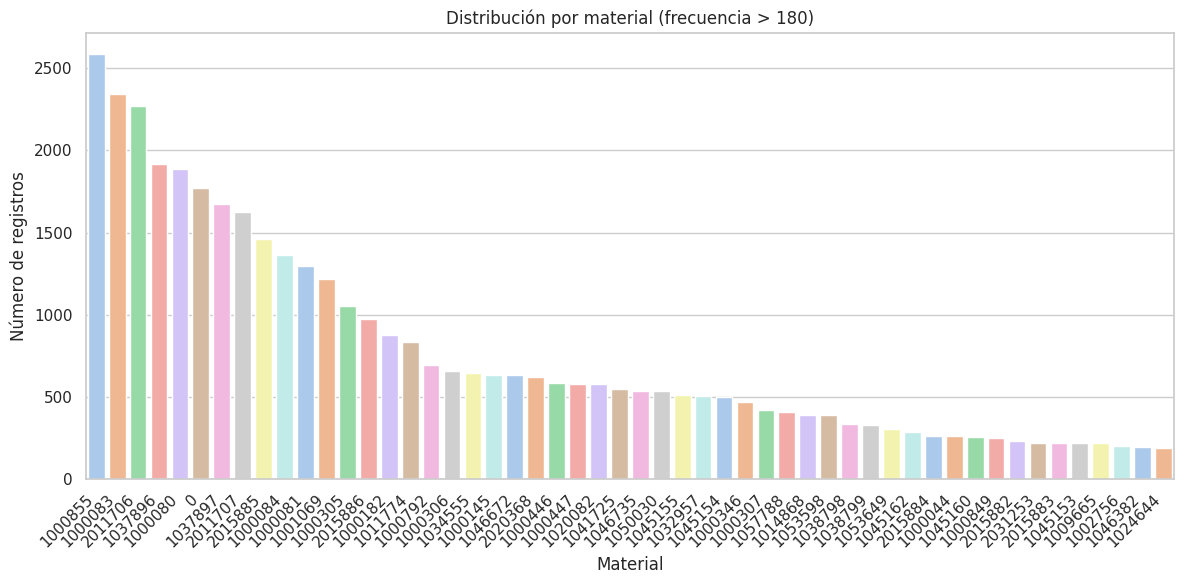

In [29]:
# Gr√°fico de barras: Material
plt.figure(figsize=(12,6))

# Filtrar materiales con m√°s de 180 registros
val_counts = df_nuevo['material'].value_counts()
filtered_materials = val_counts[val_counts > 180].index

# Gr√°fico con solo esos materiales
sns.countplot(
    x='material',
    data=df_nuevo[df_nuevo['material'].isin(filtered_materials)],
    palette='pastel',
    legend=False,
    order=filtered_materials
)

plt.title("Distribuci√≥n por material (frecuencia > 180)")
plt.xlabel("Material")
plt.ylabel("N√∫mero de registros")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



*An√°lisis*

En algunas categor√≠as se evidencia que hay valores de "nan" y "0" en la misma categor√≠a, en el proceso de imputaci√≥n de datos se podr√≠an tratar, por ejemplo unificarlos para su respectivo tratamiento. Se evidencian valores sobresalientes, por ejemplo, el motivo "d19", el centro "nn47", la oficina de ventas "10", la categor√≠a "alimentos larga vida", la subcategor√≠a "vegetales", la marca "zen√∫", la demanda "lv ordinaria", la causal "baja rotaci√≥n", son las m√°s sobresalientes dentro de sus variables, con respecto a otras categor√≠as.

# *An√°lisis Bivariado*

> Add blockquote



/tmp/ipython-input-276875318.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


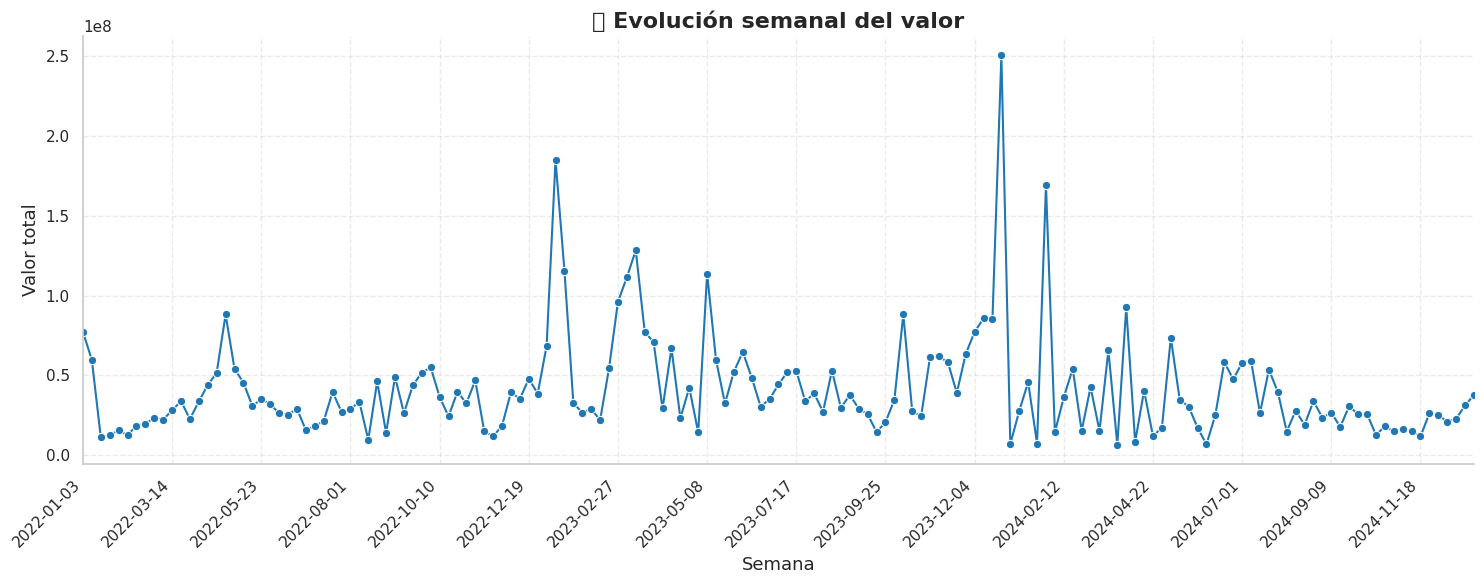

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Asegurar que 'fecha' est√© en formato datetime
df_nuevo["fecha"] = pd.to_datetime(df_nuevo["fecha"].astype(str), errors="coerce")
df_nuevo = df_nuevo.dropna(subset=["fecha"])

# Crear columna de semana (inicio de semana: lunes)
df_nuevo["semana"] = df_nuevo["fecha"].dt.to_period("W").apply(lambda r: r.start_time)

# Agrupar por semana y sumar valor total
df_semana = (
    df_nuevo.groupby("semana", observed=True)["valor"]
    .sum()
    .reset_index()
    .sort_values("semana")
)

# Gr√°fico de l√≠neas
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_semana, x="semana", y="valor", color="#1f77b4", linewidth=1.5, marker="o")

# Formato eje X
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.xlim(df_semana["semana"].iloc[0], df_semana["semana"].iloc[-1])
plt.xticks(df_semana["semana"][::max(1, len(df_semana)//15)], rotation=45, ha='right')

# T√≠tulo y etiquetas
plt.title("üìà Evoluci√≥n semanal del valor", fontsize=16, fontweight='bold')
plt.xlabel("Semana", fontsize=13)
plt.ylabel("Valor total", fontsize=13)

# Estilo
sns.despine()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


*An√°lisis*

Los picos m√°s altos se visualizan justamente en fechas de fin de a√±o (2022 y 2023) y en los a√±os 2023 y 2024 se puede observar un comportamiento embudo, de inicio de a√±o valores altos y va disminuyendo a medida que avanza el tiempo.

/tmp/ipython-input-1358461932.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nuevo.groupby(col)["valor"]
/tmp/ipython-input-1358461932.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


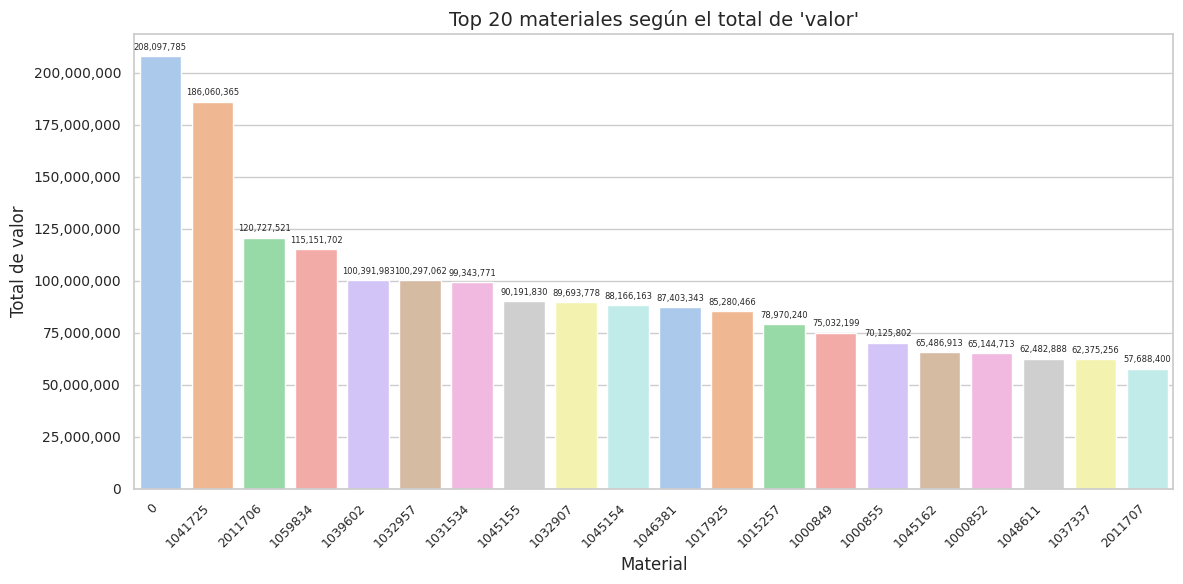

In [31]:
col = "material"

# Agrupar, sumar y ordenar
df_total = (
    df_nuevo.groupby(col)["valor"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Seleccionar el top 20
df_top20 = df_total.head(20)

# Gr√°fico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_top20,
    x=col,
    y="valor",
    palette="pastel",
    order=df_top20[col]
)

plt.title(f"Top 20 materiales seg√∫n el total de 'valor'", fontsize=14)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Total de valor", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar valores encima de las barras sin sobreescribir
for p in ax.patches:
    altura = p.get_height()
    # Colocar las etiquetas un poco arriba de la barra
    ax.text(
        p.get_x() + p.get_width() / 2,
        altura + (df_top20["valor"].max() * 0.01),  # espacio proporcional
        f"{altura:,.0f}",
        ha="center",
        va="bottom",
        fontsize=6,
        rotation=0
    )

# Reducir tama√±o del eje y formatear los n√∫meros con separador de miles
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=10)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()




*An√°lisis*
Que el material "0" "Salch. Viena ZENU  x 150 g" tenga el valor m√°s alto, hay que validar con la fuente de informaci√≥n si ese material est√° bien escrito y as√≠ poder hacer zoom a este material porqu√© tiene el valor m√°s alto a lo largo de 3 a√±os.


üìä Top 15 categor√≠as de 'motivo' seg√∫n el total de 'valor':
   motivo         valor
0     d19  4.059833e+09
1     d18  5.976872e+08
2     vmw  4.475300e+08
3     d88  4.034331e+08
4     d28  2.459674e+08
5     vmu  1.905067e+08
6     d24  1.803483e+08
7     d01  1.364816e+08
8     a15  9.531624e+07
9     vqm  3.581559e+07
10    d25  3.458126e+07
11    234  1.845324e+07
12    d90  1.012454e+07
13    vaw  2.540371e+06
14    d41  6.212500e+05


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


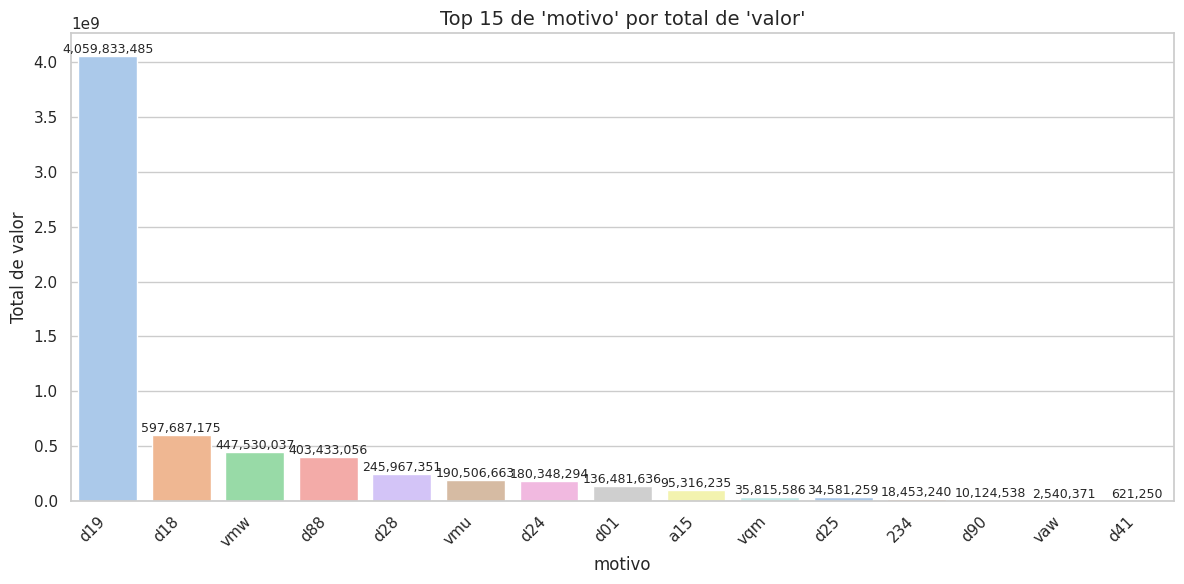


üìä Top 15 categor√≠as de 'planta' seg√∫n el total de 'valor':
        planta         valor
0     medellin  2.482970e+09
1       bogot√°  1.377607e+09
2       caloto  9.920029e+08
3     envigado  4.588217e+08
4      la ceja  4.194745e+08
5     comprado  3.684297e+08
6       amarre  2.245241e+08
7     rionegro  7.763148e+07
8   la tebaida  5.472711e+07
9        meals  2.994808e+06
10       setas  7.506000e+04
11     armenia  4.875000e+04


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


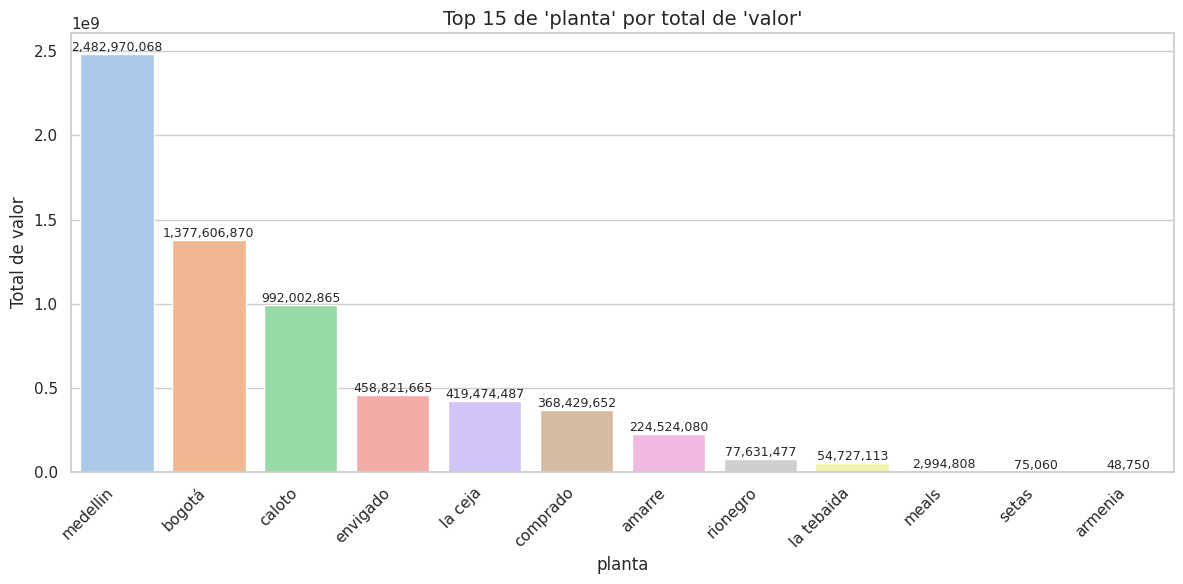


üìä Top 15 categor√≠as de 'centro' seg√∫n el total de 'valor':
   centro         valor
0    nn18  1.463100e+09
1    nn13  1.042292e+09
2    nn97  4.786931e+08
3    nn24  4.349030e+08
4    nn29  4.133748e+08
5    nn21  3.732730e+08
6    nn14  3.524207e+08
7    nn68  2.720839e+08
8    nn47  2.113661e+08
9    nn28  1.867196e+08
10   nn53  1.821332e+08
11   nn69  9.134786e+07
12   nn27  8.261338e+07
13   nn20  7.955775e+07
14   nn78  7.777092e+07


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


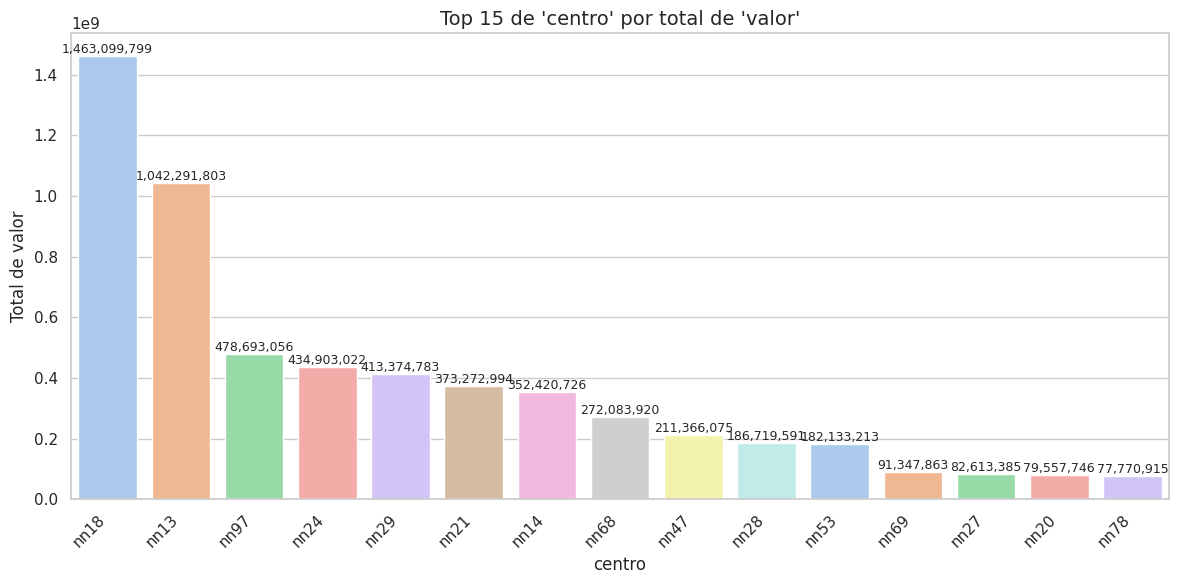


üìä Top 15 categor√≠as de 'of_ventas' seg√∫n el total de 'valor':
   of_ventas         valor
0         20  1.896510e+09
1         10  1.538807e+09
2         16  6.780039e+08
3         13  6.483743e+08
4         12  4.127356e+08
5         11  3.087674e+08
6         14  1.420101e+08
7         25  1.264371e+08
8        r58  1.136771e+08
9         17  5.369868e+07
10       f64  3.430530e+07
11        23  1.312407e+07
12       r69  6.830398e+06
13         0  4.238020e+05
14       r55  1.848920e+05


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


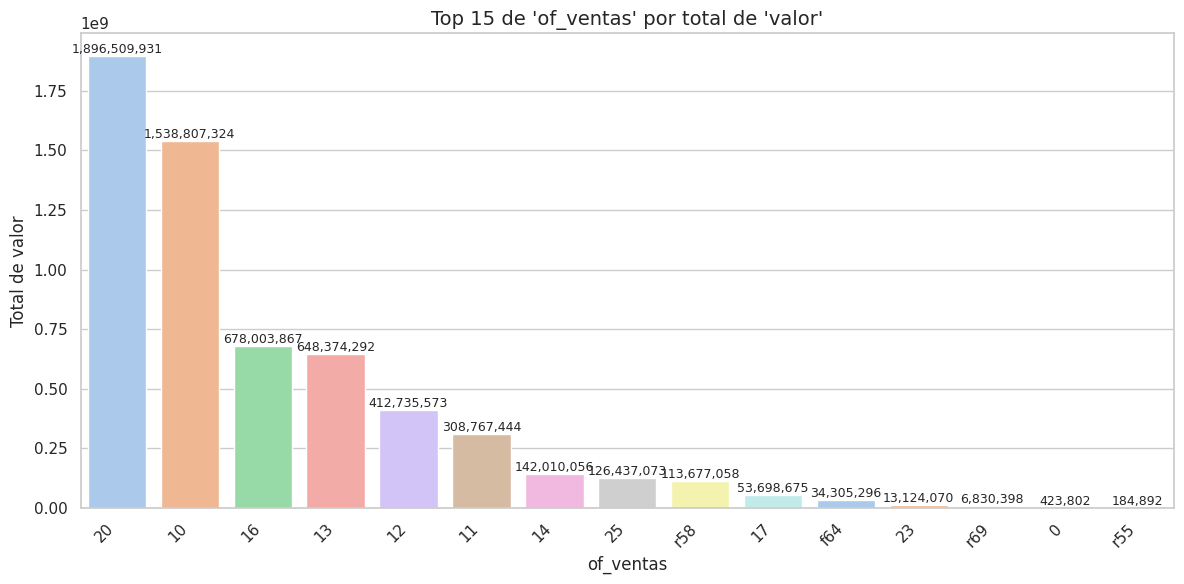


üìä Top 15 categor√≠as de 'categoria' seg√∫n el total de 'valor':
               categoria         valor
0           carnes fr√≠as  4.183015e+09
1   alimentos larga vida  1.145948e+09
2         carnes frescas  4.683587e+08
3     amarres especiales  3.177662e+08
4      platos preparados  1.131043e+08
5      analogos carnicos  1.063674e+08
6   bebidas refrescantes  4.741325e+07
7                l√°cteos  3.979174e+07
8                      0  2.399655e+07
9    pescados y mariscos  7.452589e+06
10             pasabocas  4.858840e+06
11                quesos  9.432470e+05
12         agroindustria  1.978270e+05
13           champi√±ones  8.559400e+04
14    otros distribuidos  8.358000e+03


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


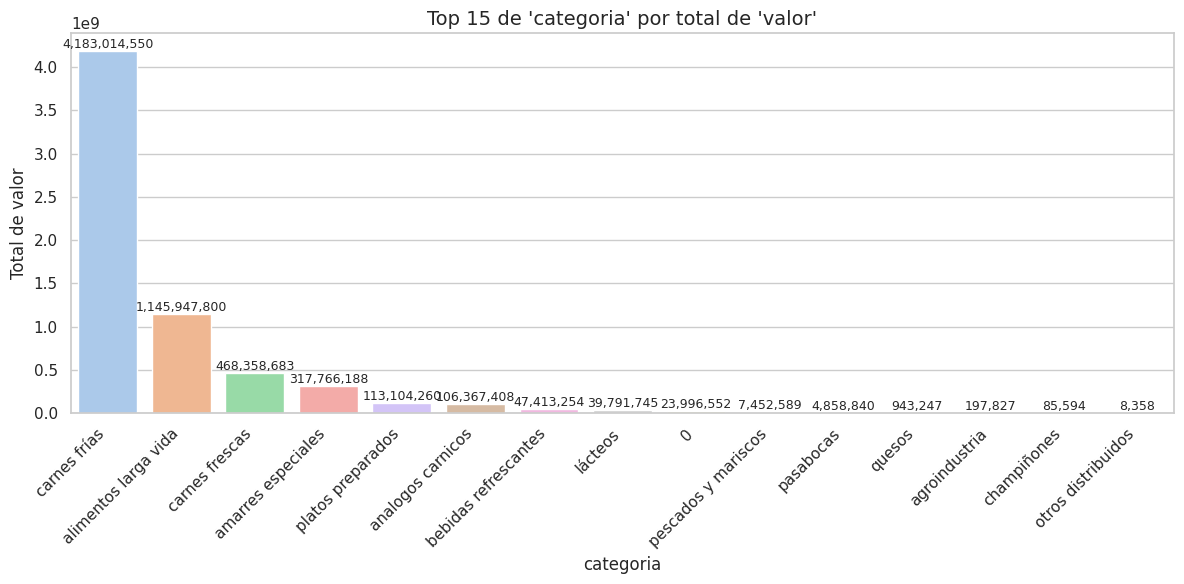


üìä Top 15 categor√≠as de 'subcategoria' seg√∫n el total de 'valor':
                       subcategoria         valor
0                    barras cortas   1.925713e+09
1                           tajados  1.111067e+09
2                        especiales  6.202920e+08
3              larga vida vegetales  4.289625e+08
4               larga vida c√°rnicos  3.302412e+08
5                     barras largas  2.667050e+08
6          larga vida platos listos  2.162350e+08
7   amarres especiales carnes fr√≠as  1.559043e+08
8                    otras proteina  4.799465e+07
9                      refrigerados  4.425571e+07
10    amarres especiales larga vida  4.306794e+07
11                       congelados  3.668028e+07
12   carnes marinadas y parrilleras  3.358083e+07
13                                0  2.399655e+07
14                            jugos  2.118650e+07


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


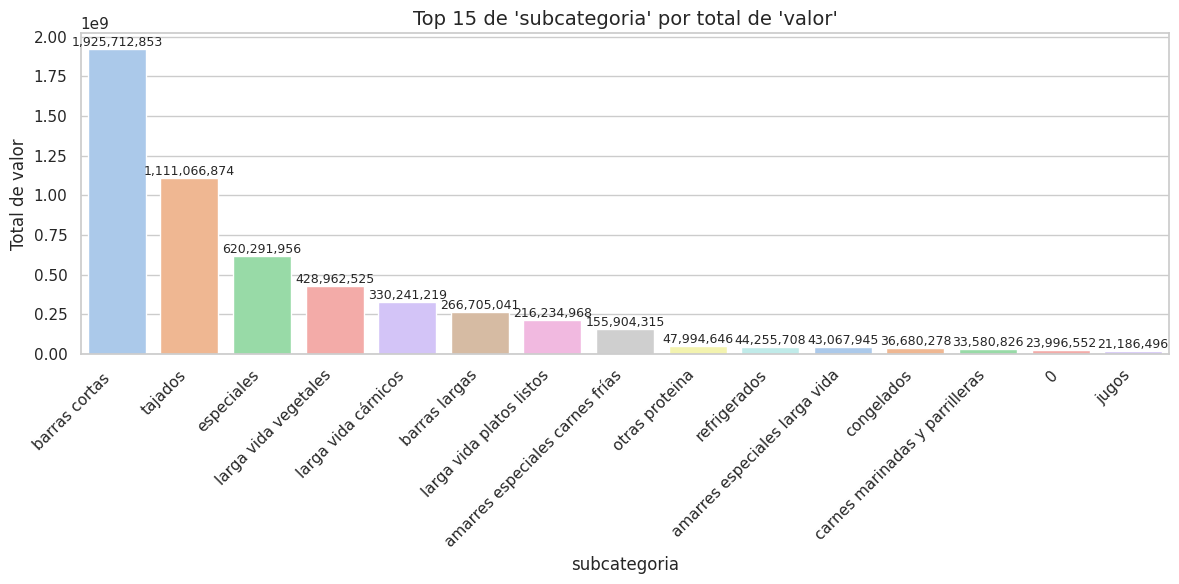


üìä Top 15 categor√≠as de 'linea' seg√∫n el total de 'valor':
                              linea         valor
0                         salchicha  1.416403e+09
1                             jam√≥n  7.307256e+08
2              chorizo y variedades  5.653083e+08
3                        temporadas  3.461471e+08
4                    especialidades  2.741448e+08
5                          tocineta  2.699964e+08
6                             cerdo  2.459116e+08
7   amarres especiales carnes fr√≠as  2.422728e+08
8                   ma√≠z larga vida  2.339106e+08
9             salchichas larga vida  2.142041e+08
10                        mortadela  1.935927e+08
11                        cervecero  1.928689e+08
12                              res  1.852976e+08
13                           granos  1.796759e+08
14                arveja larga vida  1.678526e+08


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


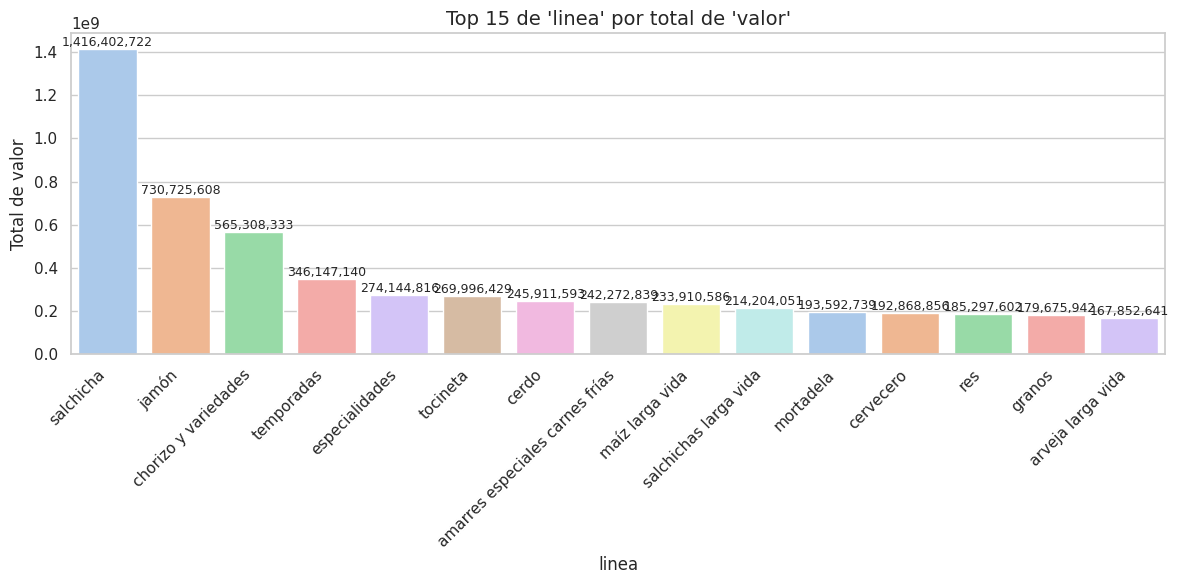


üìä Top 15 categor√≠as de 'marca' seg√∫n el total de 'valor':
                marca         valor
0                zen√∫  3.340167e+09
1            ranchera  1.425153e+09
2             pietr√°n  7.154340e+08
3               cunit  5.596530e+08
4                rica  3.310645e+08
5        country hill  5.769349e+07
6                   0  2.399655e+07
7              alpina  9.432470e+05
8   meals de colombia  1.978270e+05
9      setas de cuiv√°  7.506000e+04
10         crujientes  7.062800e+04


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


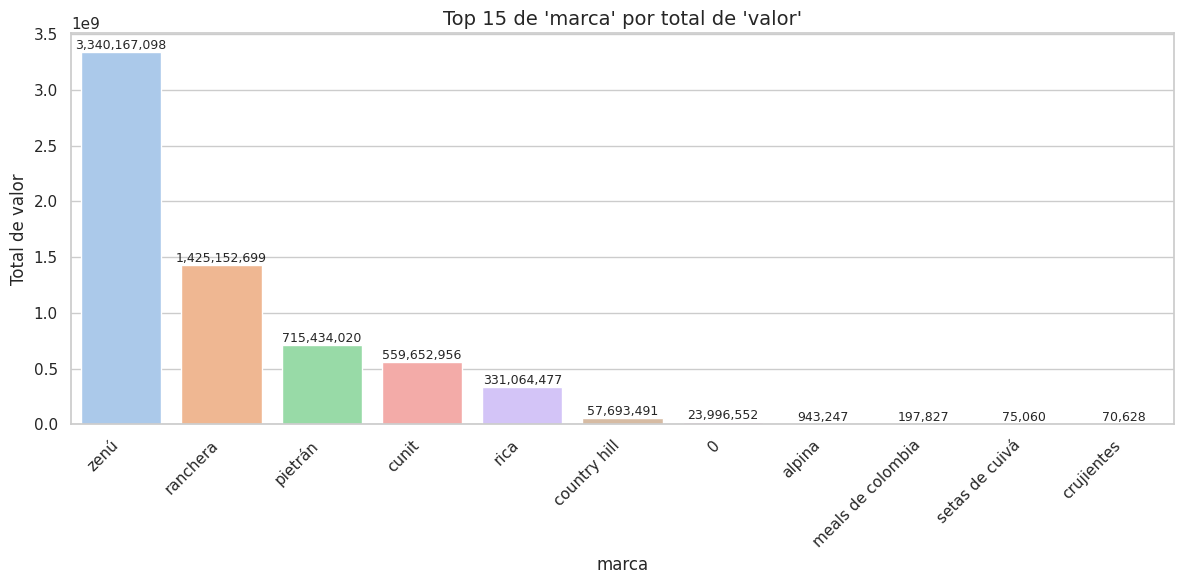


üìä Top 15 categor√≠as de 'demanda' seg√∫n el total de 'valor':
             demanda         valor
0       d. ordinaria  3.210140e+09
1  d. extraordinaria  1.983231e+09
2       lv ordinaria  1.238136e+09
3  lv extraordinaria  2.779925e+07


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


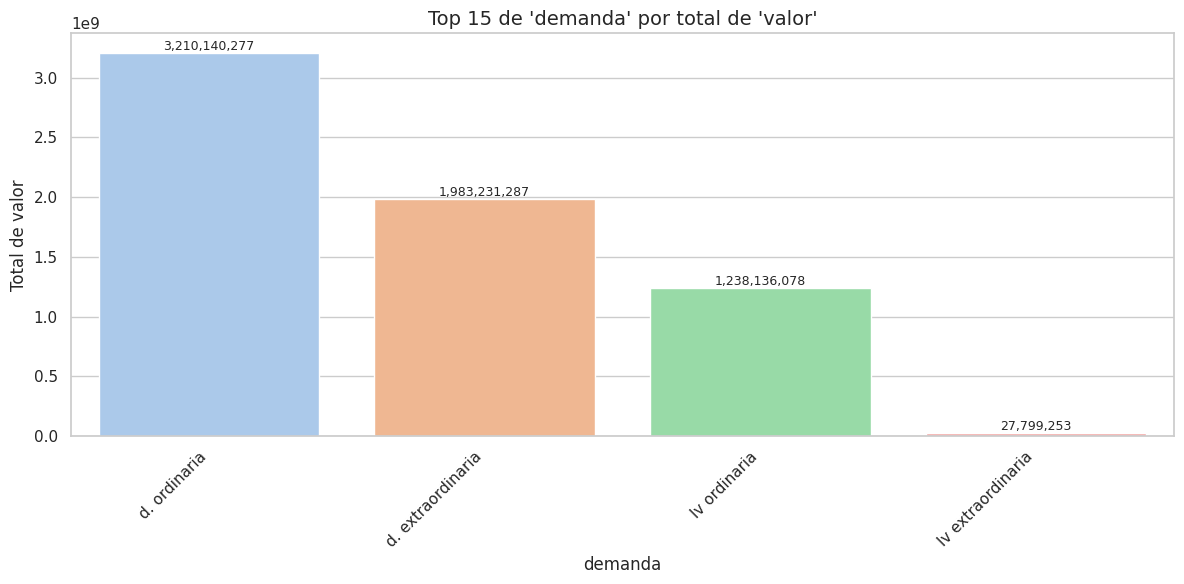


üìä Top 15 categor√≠as de 'causales' seg√∫n el total de 'valor':
                       causales         valor
0                 baja rotaci√≥n  4.781897e+09
1                       calidad  3.497639e+08
2         salida almacenamiento  2.998371e+08
3                      medell√≠n  2.353883e+08
4        devoluci√≥n de clientes  1.682113e+08
5                        bogot√°  1.258515e+08
6              perdida de vac√≠o  1.231621e+08
7   corta fecha - baja rotaci√≥n  9.531624e+07
8           aver√≠a en operaci√≥n  7.827835e+07
9                       la ceja  7.159874e+07
10                            0  5.169008e+07
11                       caloto  3.796027e+07
12                       amarre  1.950044e+07
13                     envigado  5.998731e+06
14                   la tebaida  5.375930e+06


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


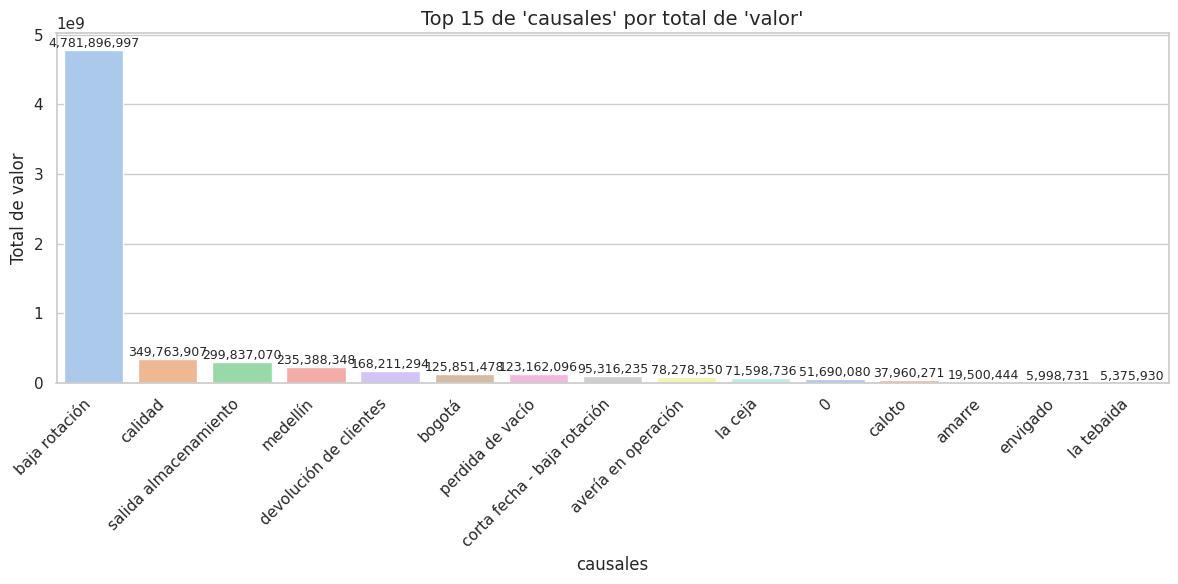

In [32]:
# Estilo visual
sns.set_theme(style="whitegrid")

# Variable continua a analizar
var_y = "valor"

# Lista de variables categ√≥ricas (excluyendo 'fecha' y 'material')
cat_cols = [
    col for col in df_nuevo.select_dtypes(include=['category']).columns
    if col not in ['fecha', 'material']
]

# Iterar sobre cada variable categ√≥rica
for col in cat_cols:
    # Agrupar y calcular el total de "valor"
    df_total = (
        df_nuevo.groupby(col, observed=True)[var_y]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Tomar el top 15
    df_top15 = df_total.head(15)

    # Mostrar informaci√≥n
    print(f"\nüìä Top 15 categor√≠as de '{col}' seg√∫n el total de '{var_y}':")
    print(df_top15)

    # Graficar
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_top15,
        x=col,
        y=var_y,
        palette="pastel",
        order=df_top15[col]  # asegura el orden descendente
    )

    # T√≠tulo y etiquetas
    plt.title(f"Top 15 de '{col}' por total de '{var_y}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel(f"Total de {var_y}", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Mostrar valores sobre las barras
    for p in plt.gca().patches:
        plt.gca().annotate(
            f"{p.get_height():,.0f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='bottom', fontsize=9
        )

    plt.tight_layout()
    plt.show()


*An√°lisis*

El motivo de baja rotaci√≥n es la causal m√°s alta, es decir, que posiblemente es un problema de mercadeo. Siento la planta medell√≠n la que tiene el valor m√°s alto de donaci√≥n, lo que hace interesante analizar el modelo en esta planta. Las carnes fr√≠as tiene m√°s del 50% de categor√≠as donadas, que es un punto interesante para los bancos de alimentos que son los m√°s interesados. Siendo la l√≠nea de salchicha y la marca zen√∫ la m√°s donada, es decir, una marca de talla media en comparaci√≥n con pietr√°n que el alta o rica que es gamma baja.

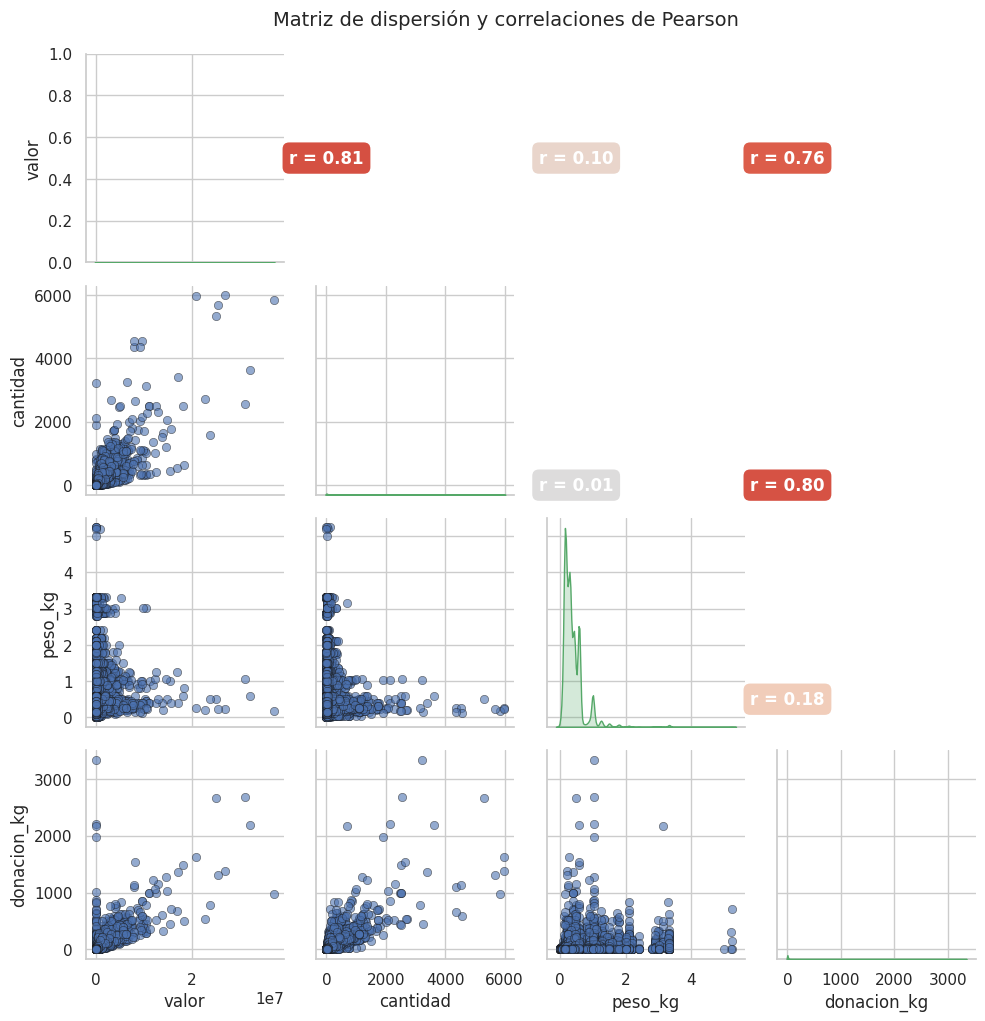

In [33]:
# --- Seleccionar las 4 variables continuas ---

variables_continuas = ["valor", "cantidad", "peso_kg", "donacion_kg"]

# --- Verificar que existan ---
for var in variables_continuas:
    if var not in df_nuevo.columns:
        raise ValueError(f"La columna '{var}' no existe en el DataFrame.")

# --- Configurar estilo gr√°fico ---
sns.set(style="whitegrid", context="notebook")

# --- Crear el PairGrid para personalizaci√≥n ---
g = sns.PairGrid(df_nuevo[variables_continuas])
g.map_lower(sns.scatterplot, color="#4C72B0", alpha=0.6, edgecolor="k")
g.map_diag(sns.kdeplot, fill=True, color="#55A868")

# --- Funci√≥n para mostrar correlaciones con color din√°mico ---
def corr_coefs(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.set_axis_off()
    # Colorear seg√∫n la intensidad de la correlaci√≥n
    color = sns.color_palette("coolwarm", as_cmap=True)( (r + 1) / 2 )
    ax.text(0.5, 0.5, f"r = {r:.2f}",
            ha="center", va="center", fontsize=12,
            color="white", weight="bold",
            bbox=dict(facecolor=color, edgecolor="none", boxstyle="round,pad=0.4"))

# --- Asignar correlaciones en la parte superior ---
g.map_upper(corr_coefs)

# --- T√≠tulo general ---
plt.suptitle("Matriz de dispersi√≥n y correlaciones de Pearson", y=1.02, fontsize=14)

plt.show()



# *An√°lisis Multivariado*


=== Varianza explicada por componente ===
PC1: 60.68%
PC2: 33.24%
PC3: 6.07%

=== Cargas de cada variable ===


PC1       PC2       PC3
cantidad     0.688676 -0.223674 -0.689707
peso_kg      0.163048  0.974640 -0.153274
donacion_kg  0.706499 -0.006899  0.707681

Componente  Autovalor       PVE  PVE acumulada
0        PC1   1.820524  0.606830        0.60683
1        PC2   0.997281  0.332421        0.93925
2        PC3   0.182252  0.060750        1.00000

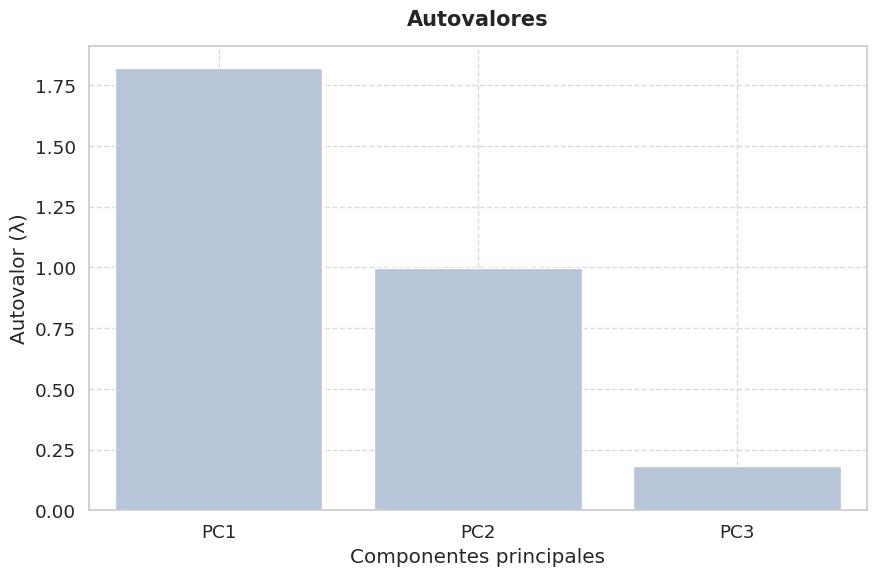

In [37]:
# An√°lisis de Componentes Principales (PCA)
# Variables: 'cantidad', 'peso_kg', 'donacion_kg'

# --- Configuraci√≥n visual ---
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.titlepad'] = 15  # espacio extra entre t√≠tulo y gr√°fico

# --- Seleccionar variables ---
variables = ["cantidad", "peso_kg", "donacion_kg"]
X = df_nuevo[variables].dropna()

# --- Estandarizar ---
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# --- PCA ---
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# --- Resultados principales ---
print("\n=== Varianza explicada por componente ===")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

# --- Cargas ---
cargas = pd.DataFrame(
    pca.components_.T,
    index=variables,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("\n=== Cargas de cada variable ===")
display(cargas)

# --- DataFrame de varianza ---
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

display(df_varianza)

# ======================================================
# GR√ÅFICO 1: Autovalores
# ======================================================
plt.figure(figsize=(9, 6))
sns.barplot(x='Componente', y='Autovalor', data=df_varianza, color='lightsteelblue')
plt.title('Autovalores', fontsize=15, weight='bold')
plt.ylabel('Autovalor (Œª)')
plt.xlabel('Componentes principales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# ======================================================
# GR√ÅFICO 2: Proporci√≥n de varianza explicada
# ======================================================
plt.figure(figsize=(9, 6))
sns.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')
sns.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')
plt.title('Proporci√≥n de varianza explicada por componente', fontsize=15, weight='bold')
plt.ylabel('Proporci√≥n de varianza')
plt.xlabel('Componentes principales')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# ======================================================
# GR√ÅFICO 3: Biplot (PC1 vs PC2)
# ======================================================
plt.figure(figsize=(8, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color="steelblue")

# vectores de carga
for i, var in enumerate(variables):
    plt.arrow(0, 0,
              pca.components_[0, i]*2,
              pca.components_[1, i]*2,
              color='r', alpha=0.8, head_width=0.05)
    plt.text(pca.components_[0, i]*2.2,
             pca.components_[1, i]*2.2,
             var, color='r', fontsize=12, weight='bold')

plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Biplot PCA (PC1 vs PC2)", fontsize=15, weight='bold')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()





De acuerdo con el an√°lisis de PCA, las tres variables inclu√≠das se podr√≠an reducir en dos factores principales que explican hasta un 93% de la informaci√≥n. Esta podr√≠a ser una buena pr√°ctica para poder reducir la dimensionalidad de la base de datos.

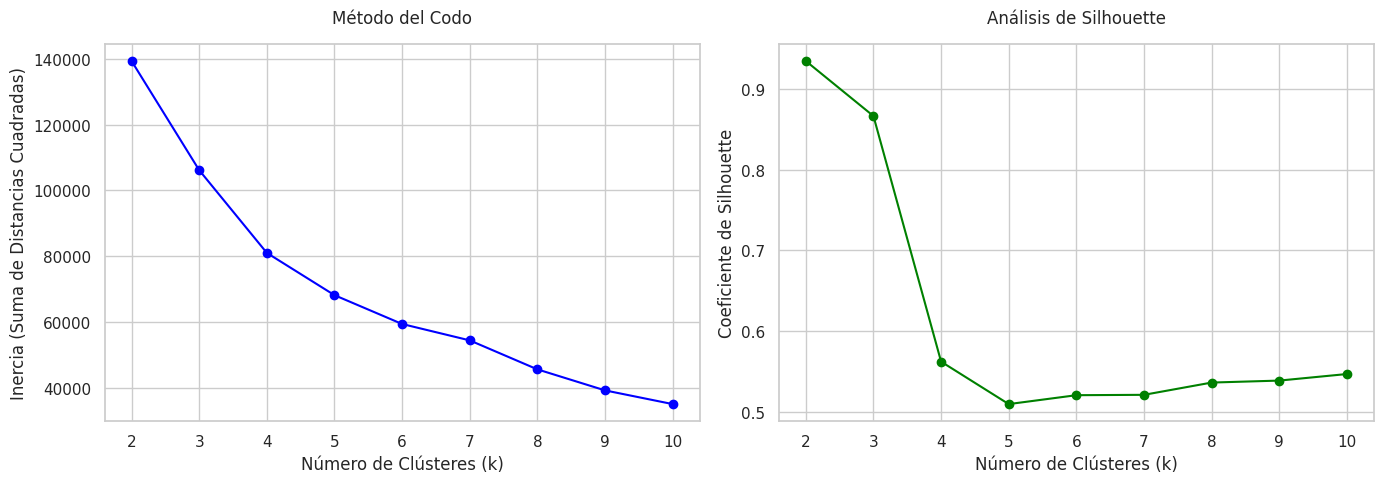

N√∫mero de cl√∫steres: 3
cluster_kmeans
0    51925
1      765
2       36
Name: count, dtype: int64


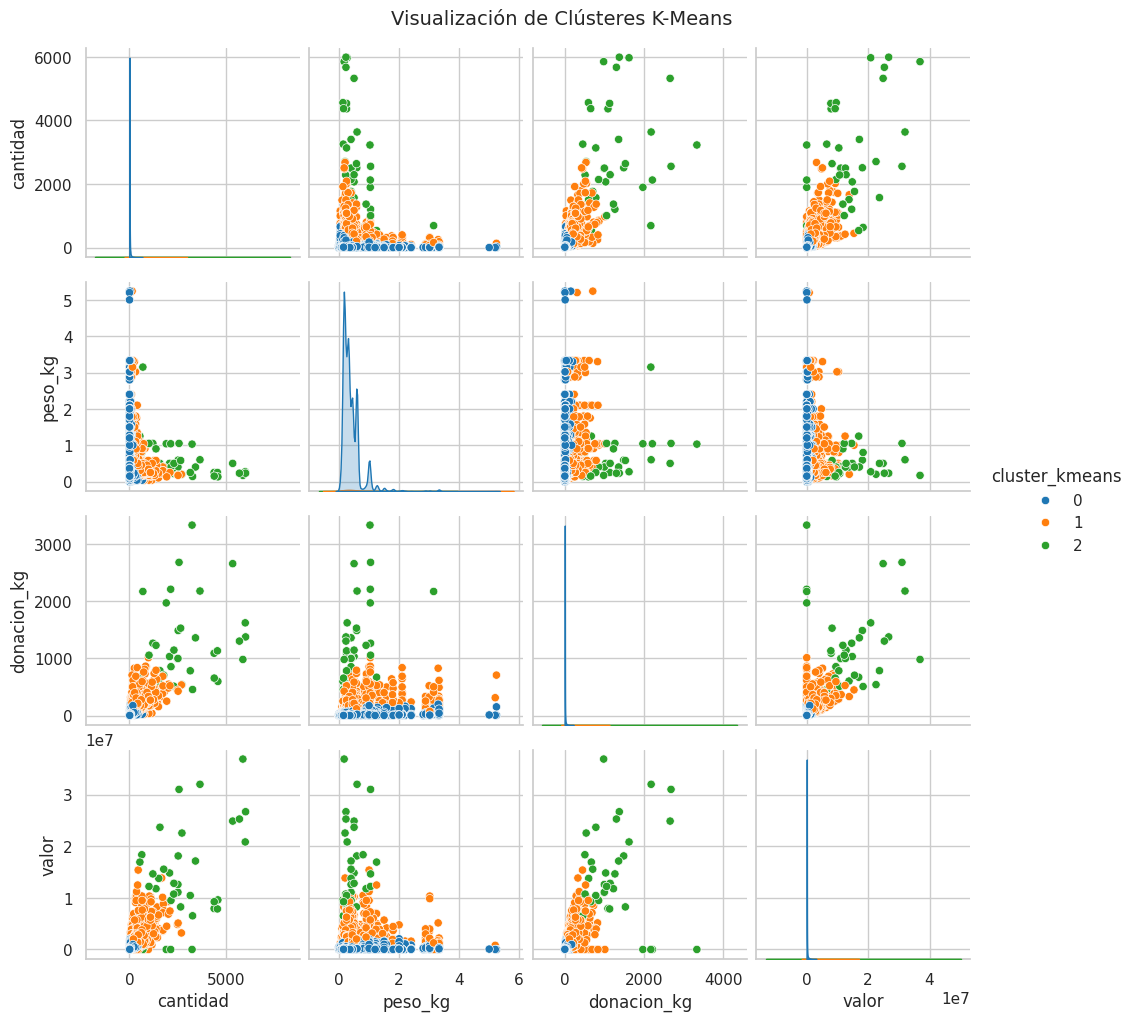

cantidad   peso_kg  donacion_kg         valor
cluster_kmeans                                                  
0                 14.205758  0.393624     5.482169  7.334907e+04
1                516.380392  0.689242   227.670758  2.778570e+06
2               2897.333333  0.595000  1264.898889  1.458472e+07

cantidad   peso_kg  donacion_kg         valor
cluster_kmeans                                                  
0                 14.205758  0.393624     5.482169  7.334907e+04
1                516.380392  0.689242   227.670758  2.778570e+06
2               2897.333333  0.595000  1264.898889  1.458472e+07

In [45]:
# ===========================================
# An√°lisis de Cl√∫ster con K-Means
# ===========================================

# Configuraci√≥n de estilo gr√°fico
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'


# --- Seleccionar variables num√©ricas ---
variables = ['cantidad', 'peso_kg', 'donacion_kg', 'valor']
df_cluster = df_nuevo[variables].dropna()

# --- Estandarizaci√≥n ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# --- Determinar n√∫mero √≥ptimo de cl√∫steres (M√©todo del codo y silhouette) ---
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# --- Gr√°fica del m√©todo del codo ---
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel('N√∫mero de Cl√∫steres (k)')
plt.ylabel('Inercia (Suma de Distancias Cuadradas)')
plt.title('M√©todo del Codo')

# --- Gr√°fica del silhouette ---
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'o-', color='green')
plt.xlabel('N√∫mero de Cl√∫steres (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('An√°lisis de Silhouette')

plt.tight_layout()
plt.show()

# --- Ajuste final del modelo  ---
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
df_nuevo['cluster_kmeans'] = kmeans_final.fit_predict(X_scaled)

# --- Resultados ---
print(f"N√∫mero de cl√∫steres: {k_optimo}")
print(df_nuevo['cluster_kmeans'].value_counts())

# --- Visualizaci√≥n: pares de variables ---
sns.pairplot(df_nuevo, vars=variables, hue='cluster_kmeans', palette='tab10')
plt.suptitle('Visualizaci√≥n de Cl√∫steres K-Means', y=1.02, fontsize=14)
plt.show()

# --- Promedio de variables por cl√∫ster ---
cluster_summary = df_nuevo.groupby('cluster_kmeans')[variables].mean()
display(cluster_summary)

# --- Promedio de variables por cl√∫ster ---
cluster_summary = df_nuevo.groupby('cluster_kmeans')[variables].mean()
display(cluster_summary)


El algoritmo K-Means identific√≥ tres grupos bien diferenciados dentro del conjunto de datos, caracterizados por distintos niveles de magnitud en producci√≥n, peso, donaciones y valor econ√≥mico:

Cl√∫ster 0 ‚Äì Bajo volumen: presenta los valores promedio m√°s bajos (cantidad ‚âà 14, donaci√≥n_kg ‚âà 5.5, valor ‚âà 73 mil). Representa operaciones peque√±as o transacciones de rutina.

Cl√∫ster 1 ‚Äì Volumen medio: muestra un incremento significativo (cantidad ‚âà 516, donaci√≥n_kg ‚âà 228, valor ‚âà 2.78 millones), asociado a actividades de mayor escala.

Cl√∫ster 2 ‚Äì Alto volumen: concentra los valores m√°s elevados (cantidad ‚âà 2.897, donaci√≥n_kg ‚âà 1.265, valor ‚âà 14.58 millones), lo que sugiere operaciones de gran impacto o eventos excepcionales de producci√≥n/donaci√≥n.

En conjunto, el modelo evidencia una segmentaci√≥n clara, √∫til para clasificar los registros en categor√≠as de baja, media y alta escala.

# **7. Detecci√≥n y an√°lisis de at√≠picos**

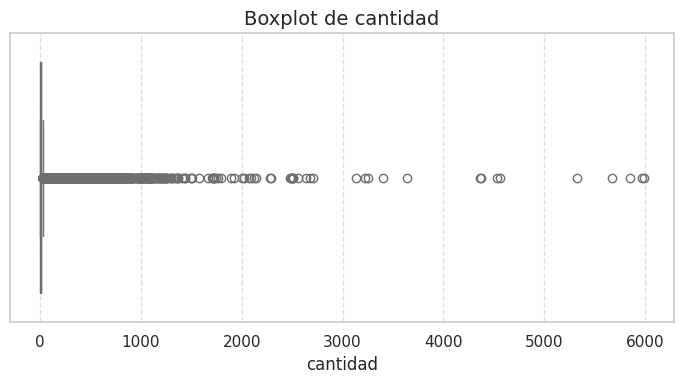

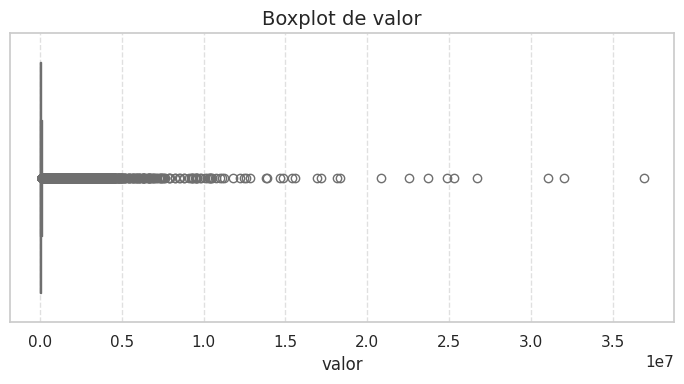

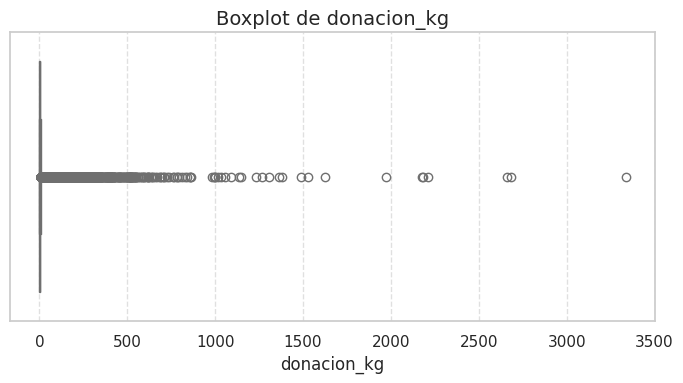

In [ ]:
# Variables a graficar
variables = ["cantidad", "valor", "peso_kg", "donacion_kg"]

# Graficar un boxplot independiente por variable en forma horizontal
for col in variables:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df_nuevo[col], color="#87CEEB")
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


De acuerdo con las gr√°ficas presentadas del Box Plot, se podr√≠a decir que las tres variables tienen un alto n√∫mero de datos at√≠picos, o tambi√©n puede ser qe sean pocos en comparaci√≥n con el tama√±o de la muestra, pero su valor es muy alto, lo que hace que est√©n sesgados hacia la derecha.

# *IQR*

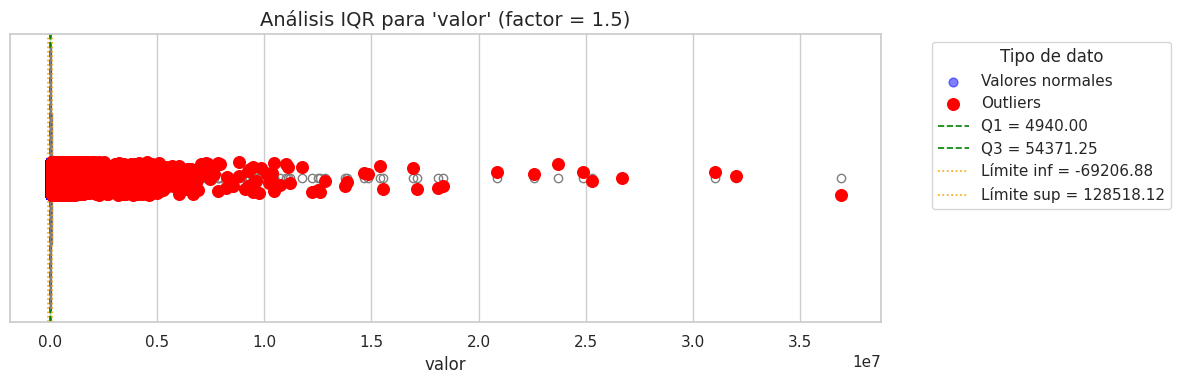


üìä Variable: valor
Q1 = 4940.00, Q3 = 54371.25, IQR = 49431.25
L√≠mite inferior: -69206.88, L√≠mite superior: 128518.12
N√∫mero de outliers detectados: 7528
----------------------------------------------------------------------


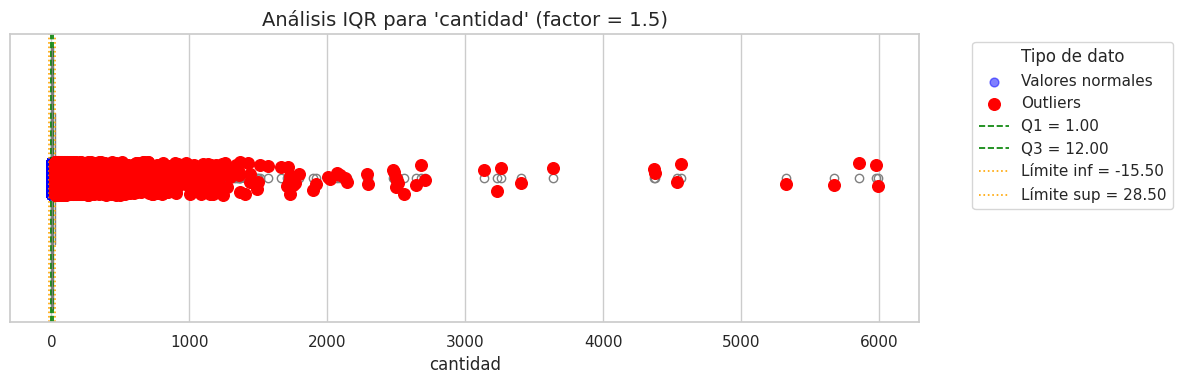


üìä Variable: cantidad
Q1 = 1.00, Q3 = 12.00, IQR = 11.00
L√≠mite inferior: -15.50, L√≠mite superior: 28.50
N√∫mero de outliers detectados: 6871
----------------------------------------------------------------------



üìä Variable: peso_kg
Q1 = 0.18, Q3 = 0.50, IQR = 0.32
L√≠mite inferior: -0.30, L√≠mite superior: 0.98
N√∫mero de outliers detectados: 3898
----------------------------------------------------------------------



üìä Variable: donacion_kg
Q1 = 0.45, Q3 = 4.20, IQR = 3.75
L√≠mite inferior: -5.17, L√≠mite superior: 9.82
N√∫mero de outliers detectados: 7503
----------------------------------------------------------------------


In [ ]:
# --- Aplicar an√°lisis IQR a cada variable ---
for var in variables_continuas:
    datos = df_nuevo[var].dropna().values  # eliminar posibles NaN

    # C√°lculo de cuartiles e IQR
    Q1, Q3 = np.percentile(datos, [25, 75])
    IQR = Q3 - Q1

    # L√≠mite inferior y superior con el factor cl√°sico 1.5
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Clasificaci√≥n de valores
    outliers_iqr = datos[(datos < lim_inf) | (datos > lim_sup)]
    normales_iqr = datos[(datos >= lim_inf) & (datos <= lim_sup)]

    # --- Visualizaci√≥n ---
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=datos, color="lightgray")

    # Puntos azules = normales | rojos = outliers
    plt.scatter(normales_iqr,
                np.random.uniform(-0.05, 0.05, size=len(normales_iqr)),
                color="blue", s=40, alpha=0.5, label="Valores normales")
    plt.scatter(outliers_iqr,
                np.random.uniform(-0.05, 0.05, size=len(outliers_iqr)),
                color="red", s=70, zorder=5, label="Outliers")

    # L√≠neas de referencia
    plt.axvline(Q1, color="green", linestyle="--", linewidth=1.2, label=f"Q1 = {Q1:.2f}")
    plt.axvline(Q3, color="green", linestyle="--", linewidth=1.2, label=f"Q3 = {Q3:.2f}")
    plt.axvline(lim_inf, color="orange", linestyle=":", linewidth=1.2, label=f"L√≠mite inf = {lim_inf:.2f}")
    plt.axvline(lim_sup, color="orange", linestyle=":", linewidth=1.2, label=f"L√≠mite sup = {lim_sup:.2f}")

    # --- Etiquetas y t√≠tulo ---
    plt.xlabel(var, fontsize=12)
    plt.title(f"An√°lisis IQR para '{var}' (factor = 1.5)", fontsize=14)
    plt.legend(title="Tipo de dato", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    # --- Resumen num√©rico ---
    print(f"\nüìä Variable: {var}")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"L√≠mite inferior: {lim_inf:.2f}, L√≠mite superior: {lim_sup:.2f}")
    print(f"N√∫mero de outliers detectados: {len(outliers_iqr)}")
    print("-" * 70)


El an√°lisis IQR revela una alta proporci√≥n de valores at√≠picos en la mayor√≠a de las variables.

Valor presenta 7.528 outliers (‚âà14.5%), evidenciando una amplia dispersi√≥n en los montos, posiblemente por operaciones de alto valor o registros excepcionales.

Cantidad registra 6.871 casos at√≠picos (‚âà13.2%), indicando variabilidad significativa en las unidades donadas.

Peso_kg muestra una menor incidencia de outliers (3.898; ‚âà7.5%), reflejando una distribuci√≥n m√°s homog√©nea.

Donacion_kg presenta 7.503 outliers (‚âà14.4%), lo que sugiere episodios puntuales de donaciones elevadas o inconsistencias en los registros.

En conjunto, los resultados indican que entre el 7% y el 15% de los datos se consideran at√≠picos, por lo que se recomienda evaluar su impacto antes de aplicar an√°lisis estad√≠sticos sensibles a valores extremos o considerar t√©cnicas de transformaci√≥n o depuraci√≥n de datos.

# *ISOLATION FOREST*

In [ ]:
# Detecci√≥n de outliers multivariada con Isolation Forest


# Configuraci√≥n visual
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (8, 6)
np.random.seed(42)

# Variables a analizar
vars_analisis = ["cantidad", "peso_kg", "donacion_kg"]

# Filtrar y limpiar datos faltantes
df_par = df_nuevo[vars_analisis].dropna()

# Escalado de datos (todas las observaciones)
X_scaled = StandardScaler().fit_transform(df_par)

# Par√°metros del Isolation Forest
iso_params = {
    "contamination": 0.05,  # proporci√≥n estimada de outliers
    "random_state": 42,
    "n_estimators": 300,
    "n_jobs": -1
}

# Entrenamiento del modelo
iso = IsolationForest(**iso_params)
y_pred = iso.fit_predict(X_scaled)          # 1 = normal, -1 = outlier
scores = -iso.decision_function(X_scaled)   # mayor = m√°s an√≥malo

# A√±adir resultados al dataframe original
df_par["anomaly"] = y_pred
df_par["score"] = scores

# Conteo de anomal√≠as
n_outliers = (df_par["anomaly"] == -1).sum()
print(f"üîé Outliers detectados: {n_outliers} de {len(df_par)} observaciones.")
print(f"Porcentaje de outliers: {100 * n_outliers / len(df_par):.2f}%")

# ========================
# Visualizaci√≥n 3D
# ========================
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

colores = df_par["anomaly"].map({1: "blue", -1: "red"})

ax.scatter(
    df_par["cantidad"],
    df_par["peso_kg"],
    df_par["donacion_kg"],
    c=colores,
    alpha=0.6,
    s=30
)

ax.set_xlabel("Cantidad")
ax.set_ylabel("Peso (kg)")
ax.set_zlabel("Donaci√≥n (kg)")
ax.set_title(f"Detecci√≥n multivariada de anomal√≠as (Isolation Forest)\nOutliers detectados: {n_outliers}")
plt.show()

# ========================
# Visualizaci√≥n 2D de puntuaciones
# ========================
plt.figure(figsize=(10, 4))
sns.histplot(df_par["score"], bins=30, kde=True, color="gray")
plt.title("Distribuci√≥n de puntuaciones de anomal√≠a (score)")
plt.xlabel("Score (mayor = m√°s an√≥malo)")
plt.show()

# ========================
# Integrar resultados al df_nuevo completo
# ========================
df_nuevo = df_nuevo.join(df_par[["anomaly", "score"]], how="left")

print("\nColumnas a√±adidas al df_nuevo: 'anomaly', 'score'")
print(df_nuevo[["anomaly", "score"]].head())


üîé Outliers detectados: 2632 de 52726 observaciones.
Porcentaje de outliers: 4.99%



Columnas a√±adidas al df_nuevo: 'anomaly', 'score'
   anomaly     score
0        1 -0.236547
1        1 -0.234315
2        1 -0.238770
3        1 -0.238923
4        1 -0.190560


El m√©todo Isolation Forest identific√≥ 2.632 valores at√≠picos de un total de 52.726 observaciones, lo que representa aproximadamente un 4.99% del conjunto de datos. Este porcentaje es notablemente menor al detectado por el m√©todo IQR, lo que sugiere que Isolation Forest es m√°s selectivo, enfoc√°ndose en patrones verdaderamente an√≥malos dentro de la estructura multivariable de los datos, teniendo en cuenta el an√°lisis compacto de todas las variables continuas.

En consecuencia, los resultados indican que la mayor√≠a de los registros se ajustan bien al comportamiento general del conjunto, y solo una fracci√≥n reducida presenta caracter√≠sticas inusuales que podr√≠an corresponder a casos excepcionales o errores de registro.

# *DBSCAN*

In [3]:
import pandas as pd

# Ruta del archivo CSV
ruta = "C:/Users/USUARIO/Downloads/df_nuevo.csv"


# Leer el CSV
df = pd.read_csv(ruta)

# Mostrar las primeras filas
print(df.head())

        fecha  material  cantidad motivo   valor  peso_kg  donacion_kg  \
0  2023.03.25   1001069         3    d19  5232.0     0.15         0.45   
1  2023.03.25   1011774         1    d19  3643.0     0.36         0.36   
2  2022.12.26   1035355         2    d19  8762.0     0.20         0.40   
3  2022.12.26   1035355         1    d19  4381.0     0.20         0.20   
4  2023.03.25   1000145         1    d19  2854.0     0.08         0.08   

     planta centro of_ventas             categoria         subcategoria  \
0  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   
1  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   
2  medell√≠n   nnb1       NaN          carnes fr√≠as              tajados   
3  medell√≠n   nnb1       NaN          carnes fr√≠as              tajados   
4  medell√≠n   nn47        10  alimentos larga vida  larga vida c√°rnicos   

                       linea    marca       demanda       causales  
0      salchichas larga v

In [4]:
# ===========================================
# DBSCAN con ajuste de par√°metros por par (Y = 'valor')
# ===========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# --- Configuraci√≥n visual ---
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (15, 4)
np.random.seed(42)

# --- Lista de pares X-Y ---
pares = [
    ("cantidad", "valor"),
    ("peso_kg", "valor"),
    ("donacion_kg", "valor")
]

# --- Par√°metros espec√≠ficos por par ---
parametros = {
    "cantidad": {"eps": 0.7, "min_samples": 6},
    "peso_kg": {"eps": 0.7, "min_samples": 10},
    "donacion_kg": {"eps": 0.9, "min_samples": 10}
}

# --- Graficar DBSCAN para cada par ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x_col, y_col) in enumerate(pares):
    # Datos y escalado
    X = df[[x_col, y_col]].dropna().values
    X_scaled = StandardScaler().fit_transform(X)
    
    # Obtener par√°metros espec√≠ficos
    eps = parametros[x_col]["eps"]
    min_samples = parametros[x_col]["min_samples"]
    
    # Aplicar DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = np.sum(labels == -1)

    # Graficar
    ax = axes[i]
    sns.scatterplot(
        x=df[x_col],
        y=df[y_col],
        hue=labels,
        palette='tab10',
        ax=ax,
        s=30,
        legend=False
    )
    ax.set_title(
        f"{x_col} vs {y_col}\n"
        f"Clusters: {n_clusters} | Ruido: {n_noise} | eps={eps}, min={min_samples}"
    )
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.suptitle("DBSCAN ajustado individualmente por par de variables", fontsize=14)
plt.tight_layout()
plt.show()

Los resultados que refleja el DB-SCAN, en la primera gr√°fica es evidente la diferencia entre los dos grupos para algunos valores, hay unos que se solapan; y su comportamiento es muy similar al de la tercera gr√°fica. Para la seunda gr√°fica del peso_kg vs valor, se logran identificar 5 grupos, siendo los grupos rojo, verde y morado muy cercanos y quiz√° confundiendo los subgrupos con su solapamiento. De acuerdo a estos resultados, se podr√≠a decir que estos datos se pueden analizar con subgrupos, por medio de modelos independientes que lleven a definir e identificar su comportamiento.

# **8. Conclusiones**

*   La selecci√≥n de las variables elegidas para hacer el an√°lisis de datos, sigui√≥ un proceso de dos etapas, incluyendo revisi√≥n de literatura y consulta con expertos en la cadena de abastecimiento de alimentos, en la etapa de donaci√≥n, permitiendo enfocar el estudio en las variables que realmente representan inter√©s. Siendo la variable respuesta "valor", que depende de tres variables continuas: "cantidad", "peso_kg" y "donacion_kg" y 12 categ√≥ricas: "material", "motivo", "FechaFact#", "planta", "centro", "Ofc#Ventas", "Categoria", "Subcategor√≠a", "Linea", "Marca", "Ord/Ext"	y "Causales NUEVOS"
*   En la limpieza de datos se logr√≥ obtener un df_nuevo con las caracter√≠sticas escenciales para poder hacer el an√°lisis de datos buscando obtener un df completamente manipulable gracias a sus est√°ndares de configuraci√≥n.

*   La presencia de datos "0" y "N/A" es necesario estudiarlos, ya sea por medio de t√©cnicas de imputaci√≥n u otra herramienta, ya que su presencia es interesante para el estudio.
  
*   La presencia de una alta varibilidad de toda las variables estudiadas, fue el com√∫n denominador durante todo el proceso, explicado posiblemente por el contexto del an√°lisis. En d√≥nde las donaciones pueden ser de un valor muy peque√±o normalmente, y pocas veces los valores son demasiado altos. Pero que se hace necesario estudarlos, porque son eventos que suceden ocacionalmente, puede ser por medio de varios modelos que puedan interpretar y ayudar a entender los diferentes comportamientos de estos diferentes rangos de valores.

*   El estudio ayud√≥ a conocer la data, a interpretar el valor que tiene cada registro dentro de la base de datos. Entender la importancia del contexto y c√≥mo se obtienen los datos para poder hacer conexiones de comportamientos que reflejan las herramientas. Este primer paso contribuye a afianzar el conocimiento adquirido en clase, a interpretar m√°s all√° de los resultados y valorar la importancia del an√°lisis exploratorio en la ciencia de datos.








# **Referencias**

Akka≈ü, A., & Gaur, V. (2022). OM Forum‚ÄîReducing Food Waste: An Operations Management Research Agenda. Manufacturing & Service Operations Management, 24(3), 1261-1275. https://doi.org/10.1287/msom.2021.1044